# House price prediction

## Importing the libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Setting to show all rows and columns
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)

## Importing the dataset

In [85]:
dataset = pd.read_csv('train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [86]:
## Gets the row and column structure of the data
dataset.shape

(1460, 81)

In [87]:
# Unnecessary fields are dropped
dataset.drop("Id", axis=1, inplace=True)
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [88]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [89]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0


## Variable Types

### Numerical Variables

In [90]:
# list of numeric variables
numerical_features_1 = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features_1))

# let's see the numeric variables
dataset[numerical_features_1].head()

Number of numerical variables:  37


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


### Datetime Variables

We have 4 years variable from Dataset.

In [91]:
# We can easily find the list of variables containing year information by looking at them one by one, or we can use logic like the following

year_feature = [feature for feature in numerical_features_1 if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [92]:
# let's see the year variables
dataset[year_feature].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [93]:
## Temporal Variables (Date Time Variables) We use this code to find the year difference between years and ensure that only numbers are written.
# According to the last sold date, we subtract the others and obtain a certain number of years.
for year_feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[year_feature]=dataset['YrSold']-dataset[year_feature]

In [94]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


In [95]:
numerical_features_2 = [i for i in numerical_features_1 if i not in year_feature]

print('Number of numerical variables remaining: ', len(numerical_features_2))

Number of numerical variables remaining:  36


### Discrete Variables

In [96]:
## Numeric data is divided into two main types
## 1. Continuous and Discrete Variables
# Finding discrete numerical variables in the data with their singular values ​​is a method, but it is not exact

# discrete_features=[feature for feature in numerical_features_1 if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
discrete_features=[feature for feature in numerical_features_2 if len(dataset[feature].unique())<25]

print("Kesikli Değişken Sayısı: {}".format(len(discrete_features)))

# We can also decide this by looking at or description.txt and observing the values ​​they receive.

Kesikli Değişken Sayısı: 18


In [97]:
# We see the singular value numbers in our numerical fields, this way we can understand whether they are discrete or continuous.
[print(feature, len(dataset[feature].unique())) for feature in numerical_features_2 ]

MSSubClass 15
LotFrontage 111
LotArea 1073
OverallQual 10
OverallCond 9
YearBuilt 122
YearRemodAdd 62
MasVnrArea 328
BsmtFinSF1 637
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
TotRmsAbvGrd 12
Fireplaces 4
GarageCars 5
GarageArea 441
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
MiscVal 21
MoSold 12
YrSold 5
SalePrice 663


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [98]:
dataset["3SsnPorch"]

0         0
1         0
2         0
3         0
4         0
5       320
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
53        0
54        0
55      407
56        0
57        0
58        0
59        0
60        0
61        0
62        0
63        0
64        0
65        0
66        0
67        0
68        0
69        0
70        0
71        0
72        0
73        0
74        0
75        0
76        0
77        0
78        0
79        0
80        0
81        0
82        0
83  

In [99]:
# Print 0 values, null values, and unique values for each numerical feature
for feature in numerical_features_2:
    zero_values = (dataset[feature] == 0).sum()
    null_values = dataset[feature].isnull().sum()
    unique_values = len(dataset[feature].unique())
    
    print(f"Feature: {feature}")
    print(f"Number of 0 Values: {zero_values}")
    print(f"Number of Null Values: {null_values}")
    print(f"Unique Values: {unique_values}")
    print("="*30)


Feature: MSSubClass
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 15
Feature: LotFrontage
Number of 0 Values: 0
Number of Null Values: 259
Unique Values: 111
Feature: LotArea
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 1073
Feature: OverallQual
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 10
Feature: OverallCond
Number of 0 Values: 0
Number of Null Values: 0
Unique Values: 9
Feature: YearBuilt
Number of 0 Values: 64
Number of Null Values: 0
Unique Values: 122
Feature: YearRemodAdd
Number of 0 Values: 124
Number of Null Values: 0
Unique Values: 62
Feature: MasVnrArea
Number of 0 Values: 861
Number of Null Values: 8
Unique Values: 328
Feature: BsmtFinSF1
Number of 0 Values: 467
Number of Null Values: 0
Unique Values: 637
Feature: BsmtFinSF2
Number of 0 Values: 1293
Number of Null Values: 0
Unique Values: 144
Feature: BsmtUnfSF
Number of 0 Values: 118
Number of Null Values: 0
Unique Values: 780
Feature: TotalBsmtSF
Number of 0 Values: 37


In [100]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [101]:
# I think this field is not one of the discrete_features...
dataset.groupby("LowQualFinSF")['LowQualFinSF'].count()
discrete_features.remove("LowQualFinSF")
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [102]:
# 3SsnPorch also same
dataset.groupby("3SsnPorch")['3SsnPorch'].count()
discrete_features.remove("3SsnPorch")
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [103]:
# PoolArea
dataset.groupby("PoolArea")['PoolArea'].count()
discrete_features.remove("PoolArea")
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MiscVal',
 'MoSold',
 'YrSold']

In [104]:
# MiscVal
dataset.groupby("MiscVal")['MiscVal'].count()
discrete_features.remove("MiscVal")
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'MoSold',
 'YrSold']

In [105]:
# MSSubClass is not a numerical variable and we have to convert it to "object" type
dataset["MSSubClass"] = dataset["MSSubClass"].astype("object")
discrete_features.remove("MSSubClass")
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [106]:
print('Number of discrete numerical variables: ', len(discrete_features))

Number of discrete numerical variables:  13


In [107]:
# let's see numeric discrete variables
dataset[discrete_features].head(10)

,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold
0,7,5,1,0,2,1,3,1,8,0,2,2,2008
1,6,8,0,1,2,0,3,1,6,1,2,5,2007
2,7,5,1,0,2,1,3,1,6,1,2,9,2008
3,7,5,1,0,1,0,3,1,7,1,3,2,2006
4,8,5,1,0,2,1,4,1,9,1,3,12,2008
5,5,5,1,0,1,1,1,1,5,0,2,10,2009
6,8,5,1,0,2,0,3,1,7,1,2,8,2007
7,7,6,1,0,2,1,3,1,7,2,2,11,2009
8,7,5,0,0,2,0,2,2,8,2,2,4,2008
9,5,6,1,0,1,0,2,2,5,2,1,1,2008


###  Sürekli Sayısal Değişkenler (Continuous Variables)

In [108]:
# When you remove discrete numeric variables, year variables and fields containing Id from the numeric variables, what remains are continuous numeric variables
# continuous_feature=[feature for feature in numerical_features_1 if feature not in discrete_features+year_feature+['Id']]
continuous_feature=[feature for feature in numerical_features_2 if feature not in discrete_features+["MSSubClass"]]

print("Sürekli Değişken Sayısı {}".format(len(continuous_feature)))

Sürekli Değişken Sayısı 22


In [109]:
# let's see numerical continuous variables
dataset[continuous_feature].head(10)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450,5,5,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,0,208500
1,80.0,9600,31,31,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,0,181500
2,68.0,11250,7,6,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,0,223500
3,60.0,9550,91,36,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,0,140000
4,84.0,14260,8,8,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,0,250000
5,85.0,14115,16,14,0.0,732,0,64,796,796,566,0,1362,480,40,30,0,320,0,0,700,143000
6,75.0,10084,3,2,186.0,1369,0,317,1686,1694,0,0,1694,636,255,57,0,0,0,0,0,307000
7,NaN,10382,36,36,240.0,859,32,216,1107,1107,983,0,2090,484,235,204,228,0,0,0,350,200000
8,51.0,6120,77,58,0.0,0,0,952,952,1022,752,0,1774,468,90,0,205,0,0,0,0,129900
9,50.0,7420,69,58,0.0,851,0,140,991,1077,0,0,1077,205,0,4,0,0,0,0,0,118000


### Kategorik Değişkenler (Categorical Variables)

In [110]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=='O']
categorical_features

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [111]:
for feature in categorical_features:
    print('{} number of categories of the variable {}'.format(feature,len(dataset[feature].unique())))

MSSubClass number of categories of the variable 15
MSZoning number of categories of the variable 5
Street number of categories of the variable 2
Alley number of categories of the variable 3
LotShape number of categories of the variable 4
LandContour number of categories of the variable 4
Utilities number of categories of the variable 2
LotConfig number of categories of the variable 5
LandSlope number of categories of the variable 3
Neighborhood number of categories of the variable 25
Condition1 number of categories of the variable 9
Condition2 number of categories of the variable 8
BldgType number of categories of the variable 5
HouseStyle number of categories of the variable 8
RoofStyle number of categories of the variable 6
RoofMatl number of categories of the variable 8
Exterior1st number of categories of the variable 15
Exterior2nd number of categories of the variable 16
MasVnrType number of categories of the variable 4
ExterQual number of categories of the variable 4
ExterCond num

## Missing Values

In [112]:
dataset.isnull().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
MasVnrType        872
FireplaceQu       690
LotFrontage       259
GarageYrBlt        81
GarageCond         81
GarageType         81
GarageFinish       81
GarageQual         81
BsmtExposure       38
BsmtFinType2       38
BsmtCond           37
BsmtQual           37
BsmtFinType1       37
MasVnrArea          8
Electrical          1
MSSubClass          0
Fireplaces          0
Functional          0
KitchenQual         0
KitchenAbvGr        0
BedroomAbvGr        0
HalfBath            0
FullBath            0
BsmtHalfBath        0
TotRmsAbvGrd        0
GarageCars          0
GrLivArea           0
GarageArea          0
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
BsmtFullBath        0
CentralAir

In [113]:
## here we find the rate of missing values ​​in each variable
## 1- make list of properties with missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>0]

## 2- print feature name and percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % eksik değer')

LotFrontage 0.1774  % eksik değer
Alley 0.9377  % eksik değer
MasVnrType 0.5973  % eksik değer
MasVnrArea 0.0055  % eksik değer
BsmtQual 0.0253  % eksik değer
BsmtCond 0.0253  % eksik değer
BsmtExposure 0.026  % eksik değer
BsmtFinType1 0.0253  % eksik değer
BsmtFinType2 0.026  % eksik değer
Electrical 0.0007  % eksik değer
FireplaceQu 0.4726  % eksik değer
GarageType 0.0555  % eksik değer
GarageYrBlt 0.0555  % eksik değer
GarageFinish 0.0555  % eksik değer
GarageQual 0.0555  % eksik değer
GarageCond 0.0555  % eksik değer
PoolQC 0.9952  % eksik değer
Fence 0.8075  % eksik değer
MiscFeature 0.963  % eksik değer


In [114]:
import missingno as msn

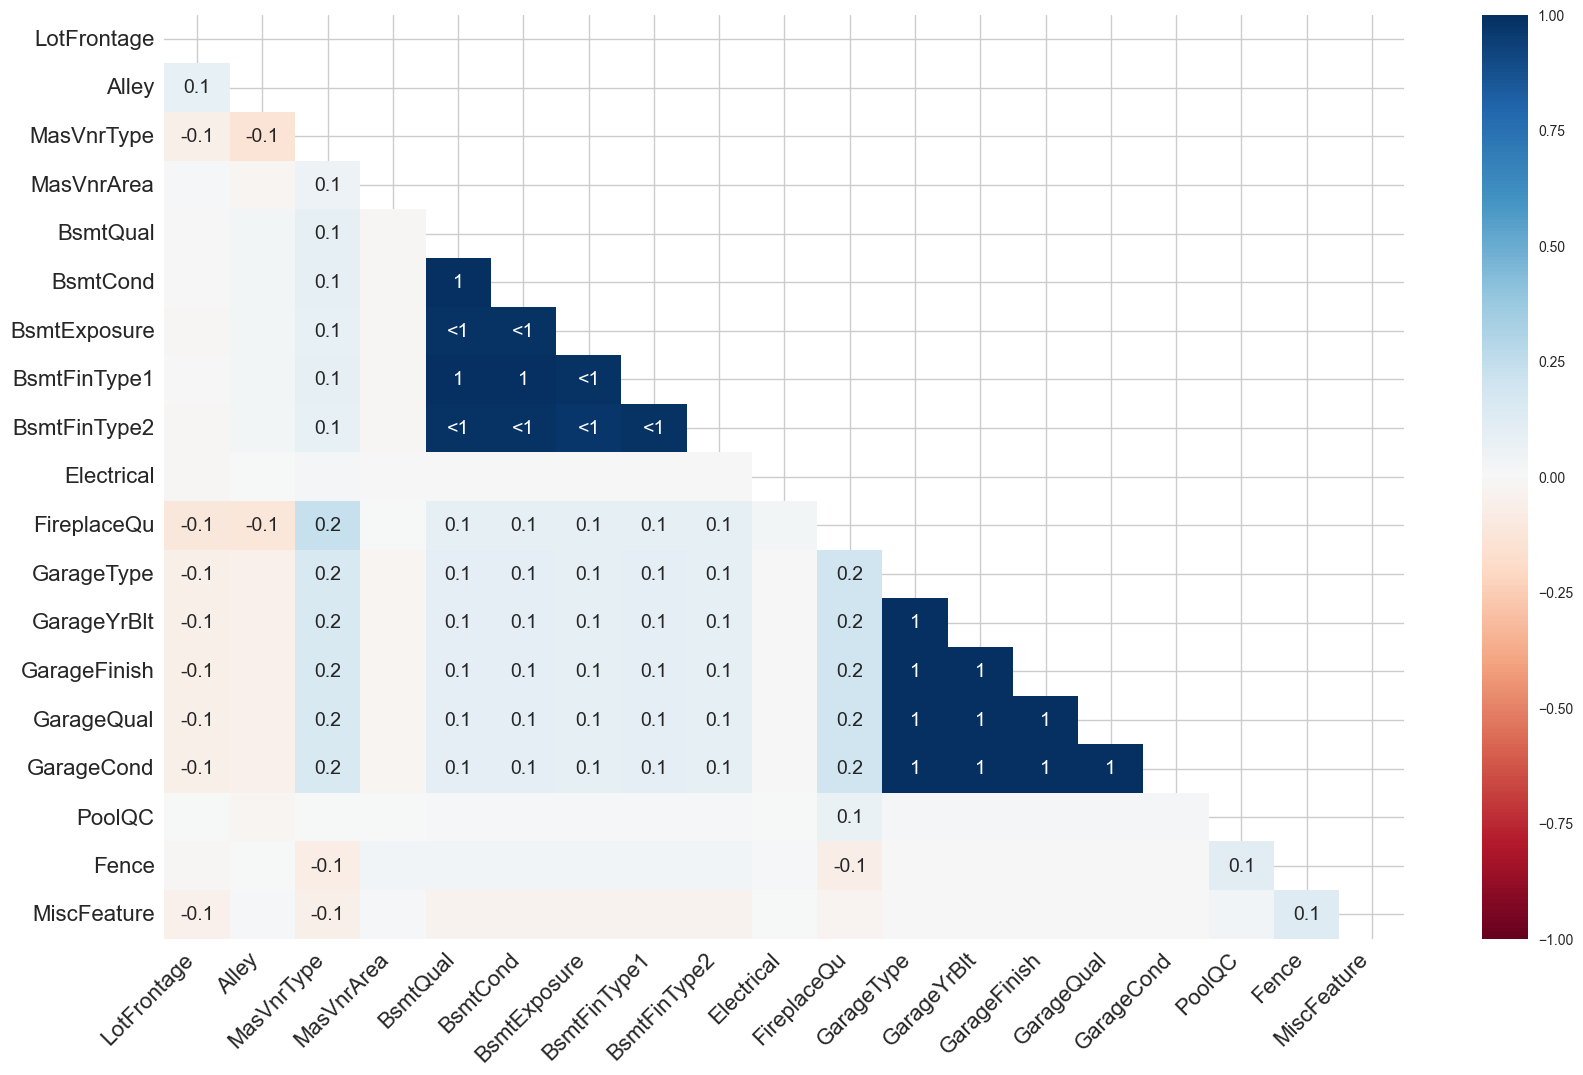

In [115]:
# fig = plt.figure(figsize =(10, 6))
# Nullity Correlation
msn.heatmap(dataset[features_with_na]);

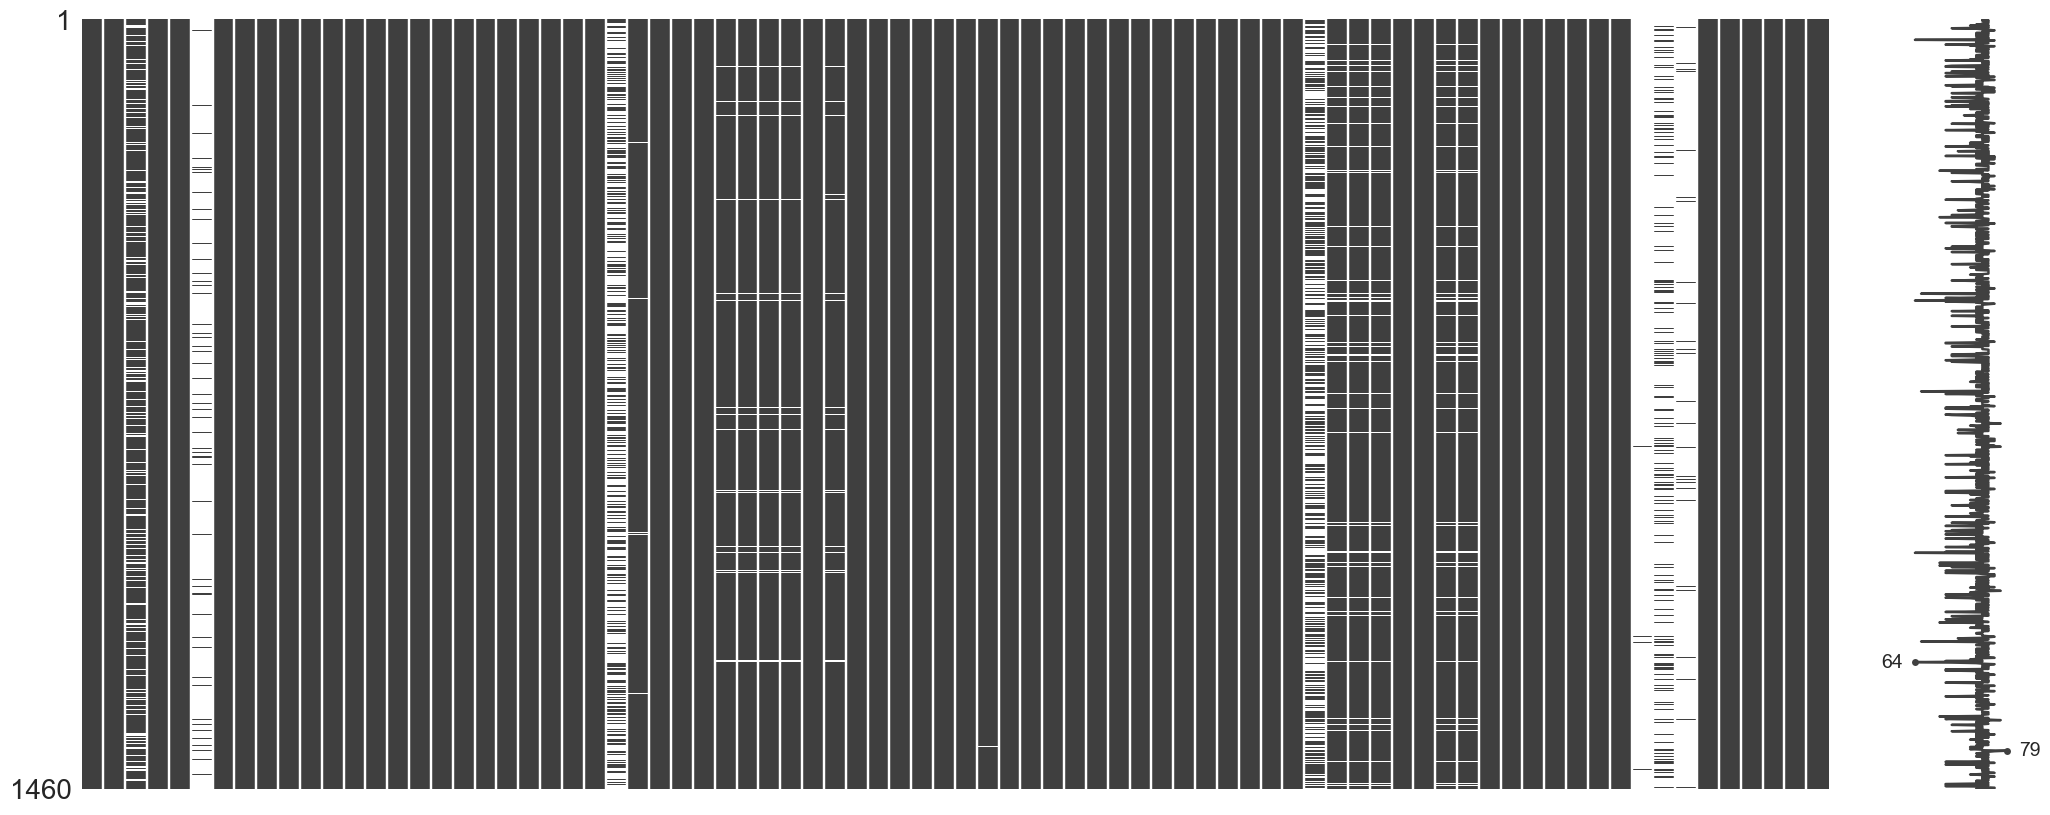

In [116]:
msn.matrix(dataset);

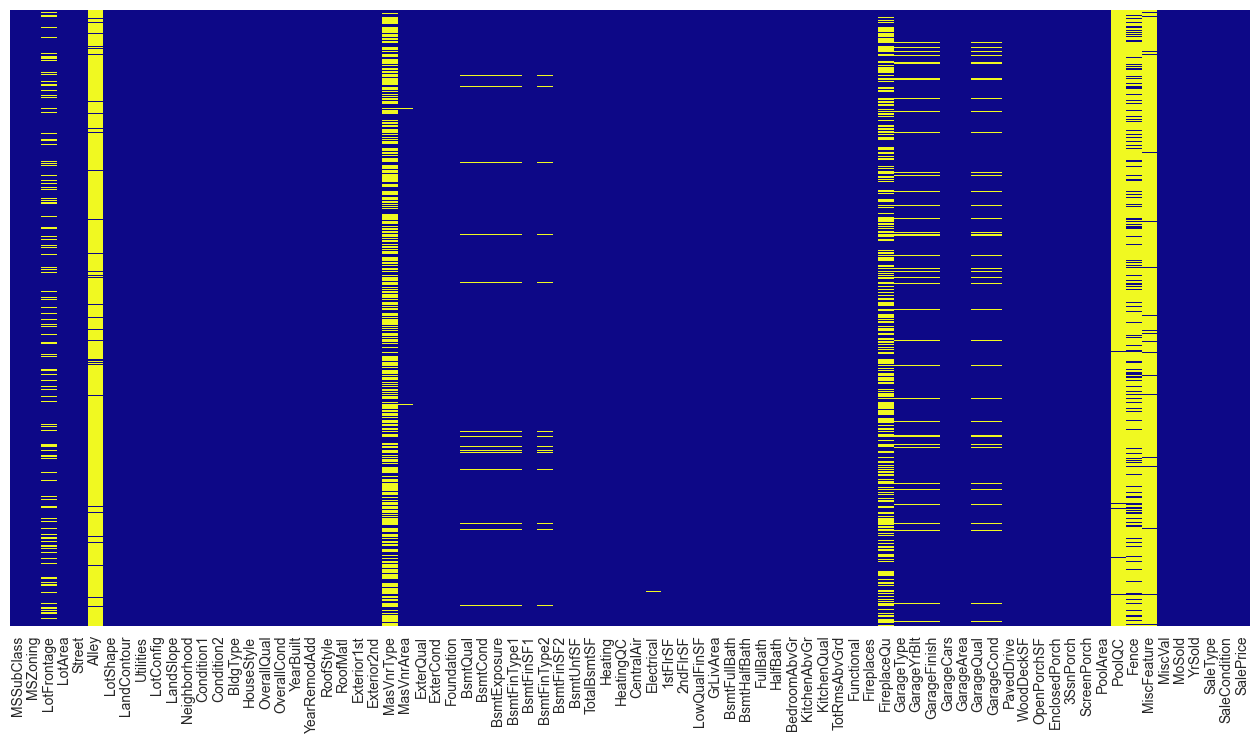

In [117]:
plt.rcParams["figure.figsize"] = (16, 8)
sns.heatmap(dataset.isnull(), yticklabels=False, cbar=False, cmap="plasma");

In [118]:
# LotFrontage
LotFrontage_mean = dataset["LotFrontage"].mean()
LotFrontage_median = dataset["LotFrontage"].median()
print("LotFrontage Mean: ", LotFrontage_mean)
print("LotFrontage Median: ", LotFrontage_median)

LotFrontage Mean:  70.04995836802665
LotFrontage Median:  69.0


In [119]:
dataset["LotFrontage"].fillna(LotFrontage_median, inplace=True)

In [120]:
dataset["Electrical"] = dataset["Electrical"].fillna(dataset["Electrical"].mode()[0])

In [121]:
garage_features = ["GarageCond", "GarageType", "GarageFinish", "GarageQual"]
for column in garage_features:
    dataset[column] = dataset[column].fillna("NA")
    
dataset["GarageYrBlt"] = dataset["GarageYrBlt"].fillna(0)

In [122]:
basement_features = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"]
for column in basement_features:
    dataset[column] = dataset[column].fillna("NA") 

In [123]:
# Fill missing values some categorical columns with "NA" (Columns that do not have that feature)
dataset["Fence"] = dataset["Fence"].fillna("NA")
dataset["FireplaceQu"] = dataset["FireplaceQu"].fillna("NA")
dataset["PoolQC"] = dataset["PoolQC"].fillna("NA")
dataset["MiscFeature"] = dataset["MiscFeature"].fillna("NA")
dataset["Alley"] = dataset["Alley"].fillna("NA")
dataset["MasVnrType"] = dataset["MasVnrType"].fillna("NA")

In [124]:
dataset["MasVnrArea"] = dataset["MasVnrArea"].fillna(0)

In [125]:
# Missing value check
dataset.isnull().sum().sum()

0

### Normalizing continuous numerical variables that are not normally distributed

Since the numerical variables are skewed, we will perform the log normal distribution

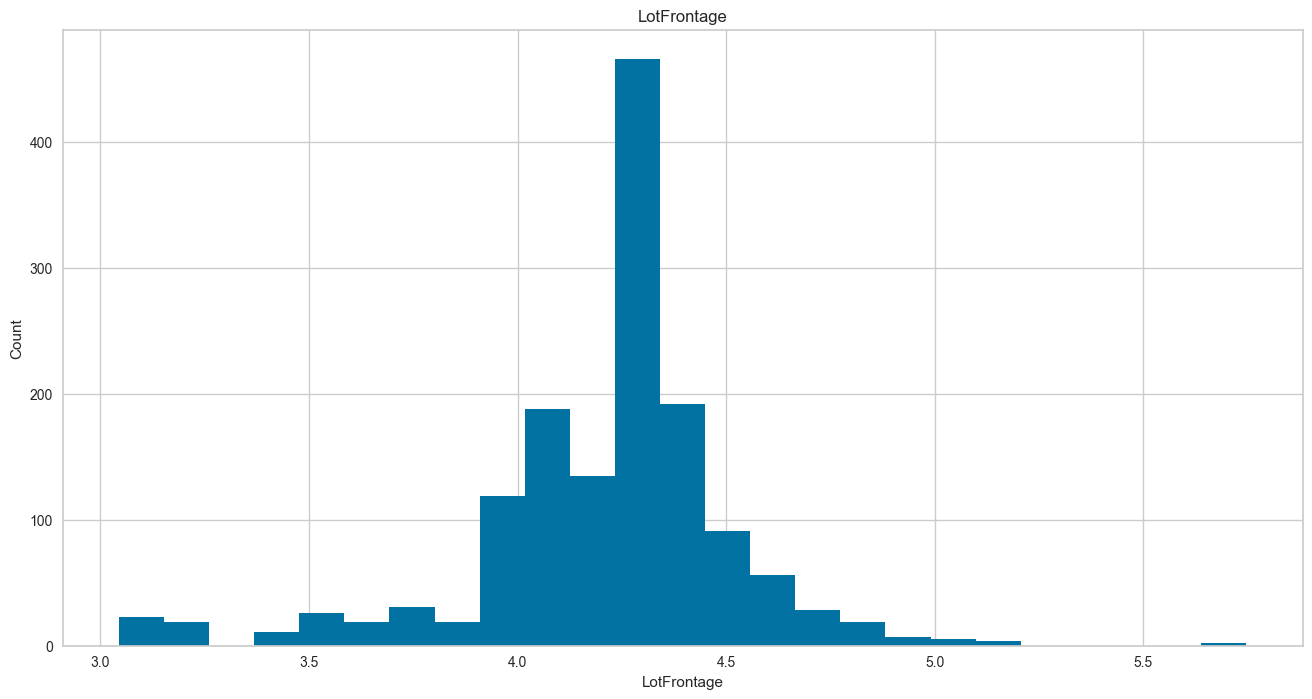

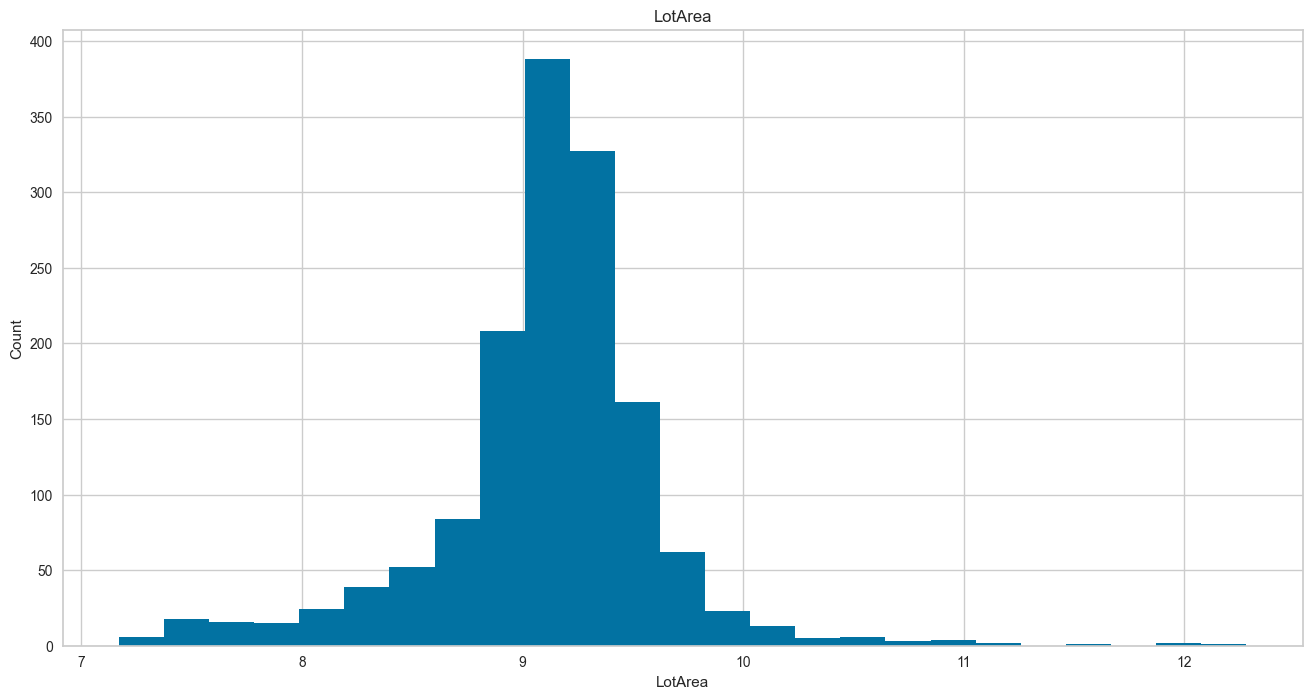

passed!
passed!
passed!
passed!
passed!
passed!
passed!


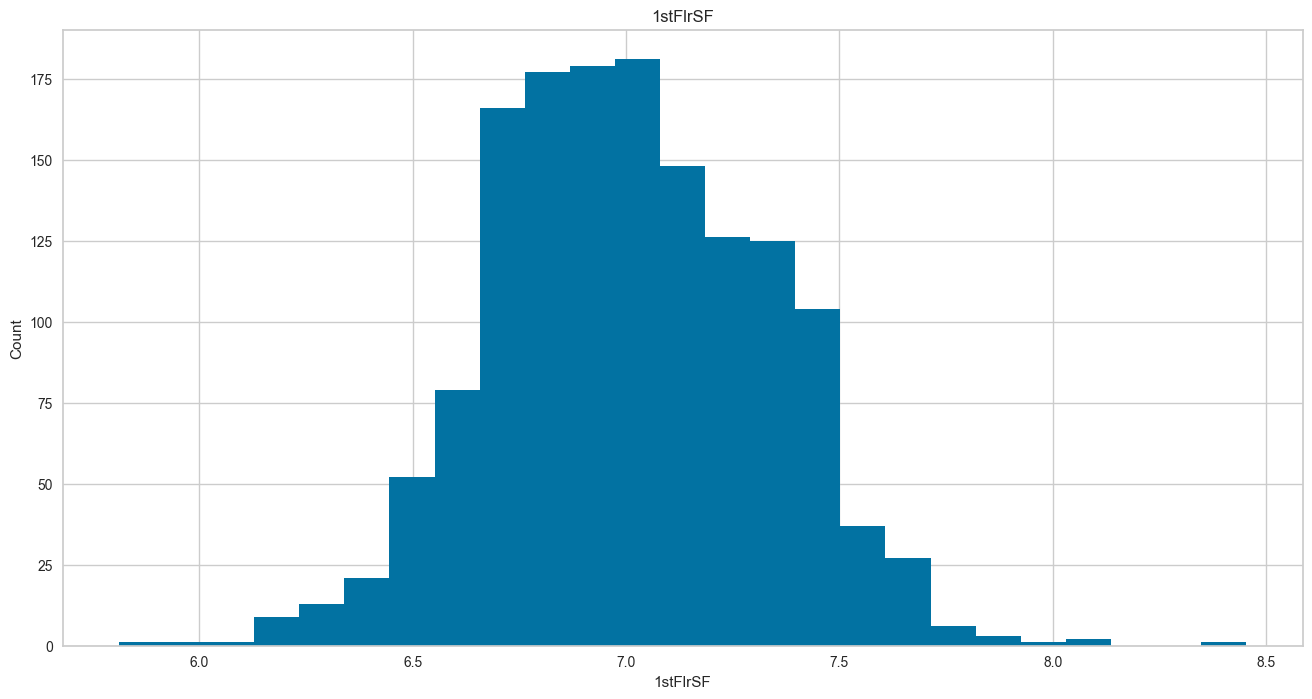

passed!
passed!


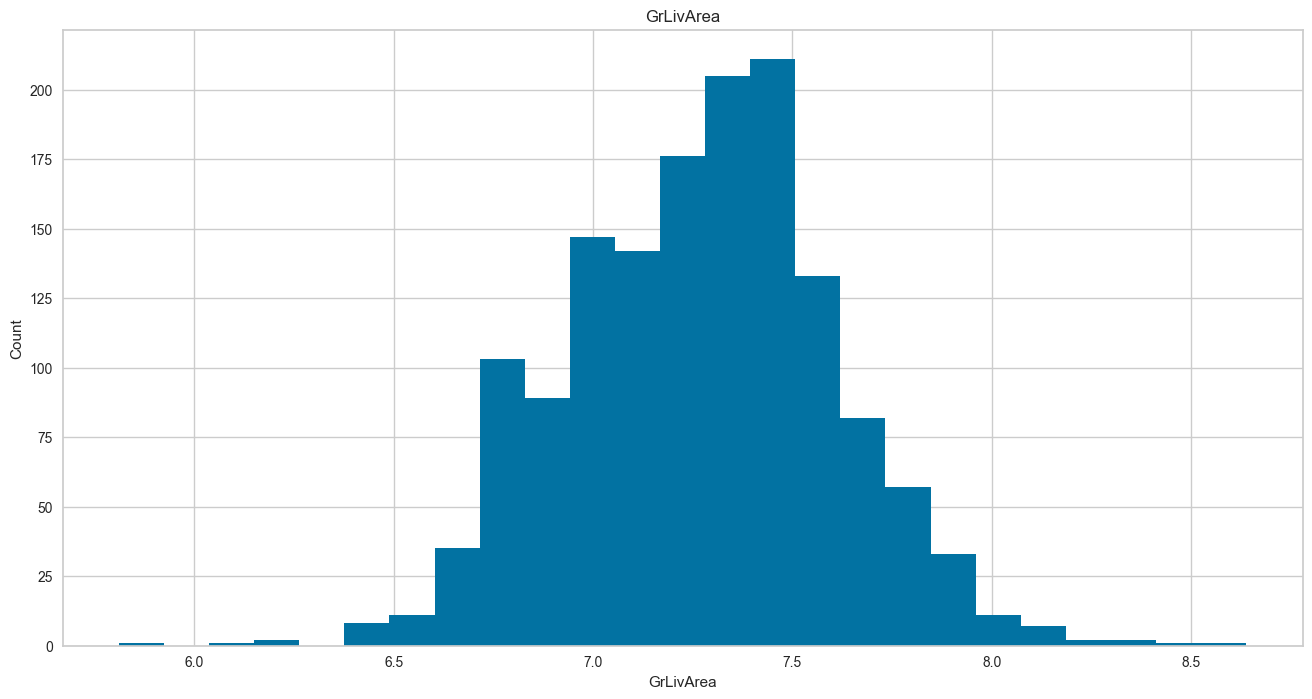

passed!
passed!
passed!
passed!
passed!
passed!
passed!
passed!


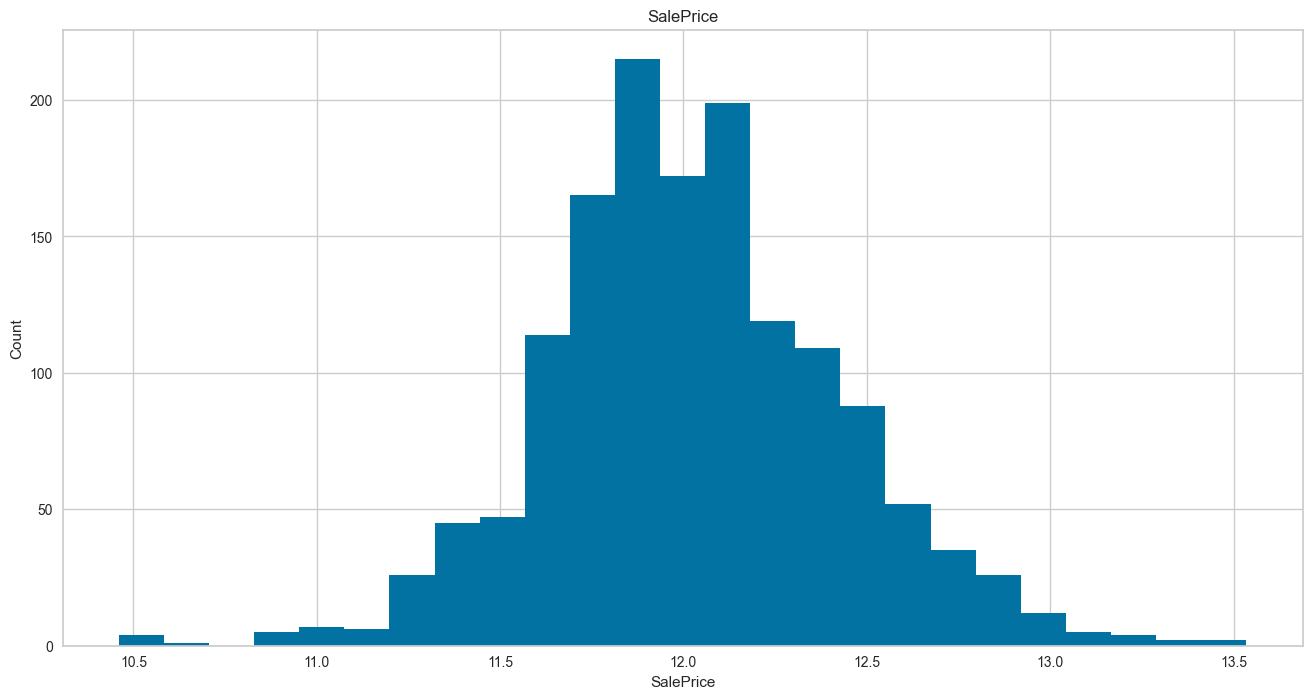

In [126]:
## We will be using logarithmic transformation

for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
        print("passed!")
    else:
        data[feature]=np.log(data[feature])
        # data['SalePrice']=np.log(data['SalePrice'])
        # plt.scatter(data[feature],data['SalePrice'])
        # plt.xlabel(feature)
        # plt.ylabel('SalesPrice')
        # plt.title(feature)
        # plt.show()
        data[feature].hist(bins=25)
        plt.xlabel(feature)
        plt.ylabel("Count")
        plt.title(feature)
        plt.show()
        
    

## Outliers

#### Let's see our Continuous Numeric Variables:

In [127]:
continuous_feature

['LotFrontage',
 'LotArea',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'SalePrice']

#### Let's first observe the Outliers in them:

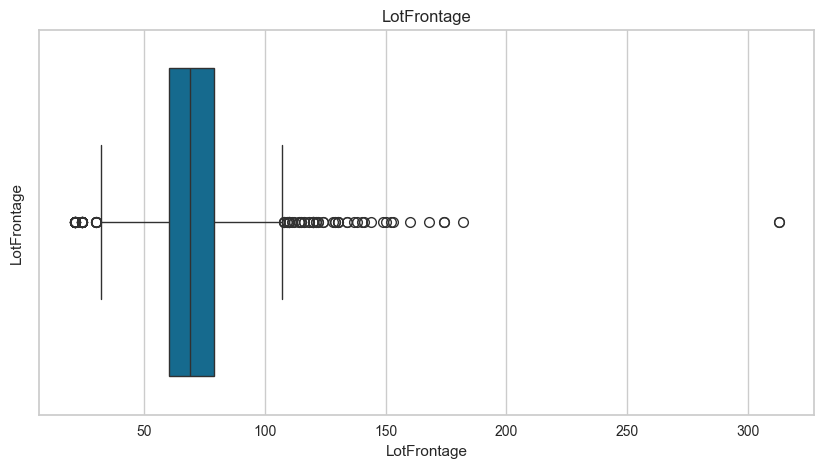

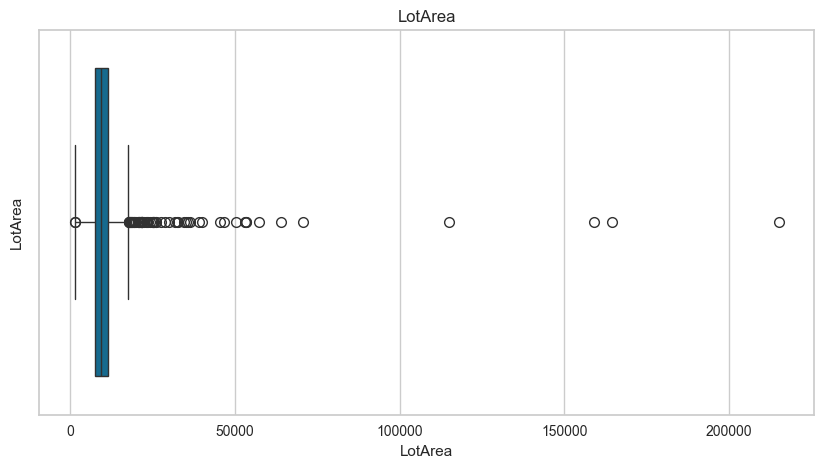

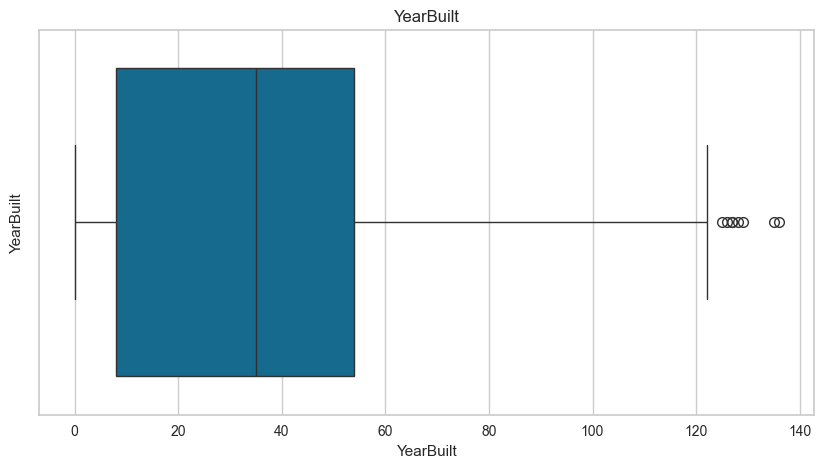

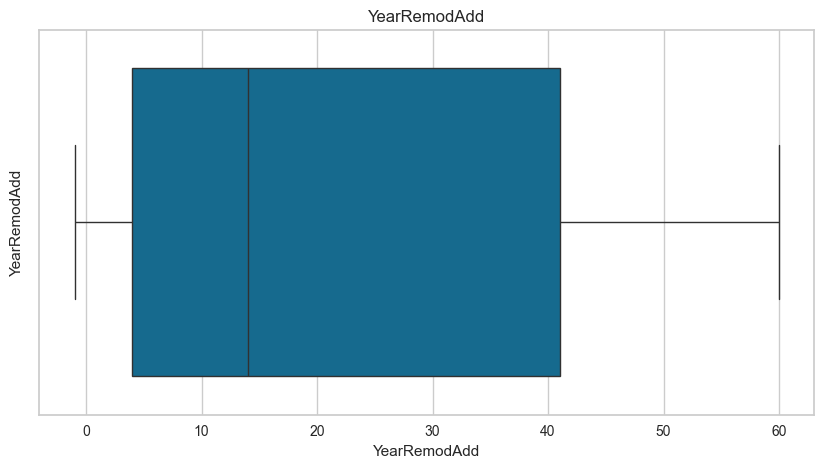

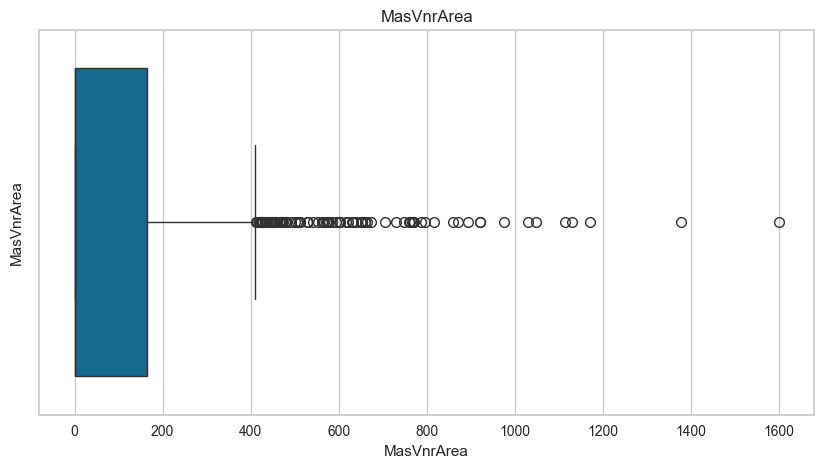

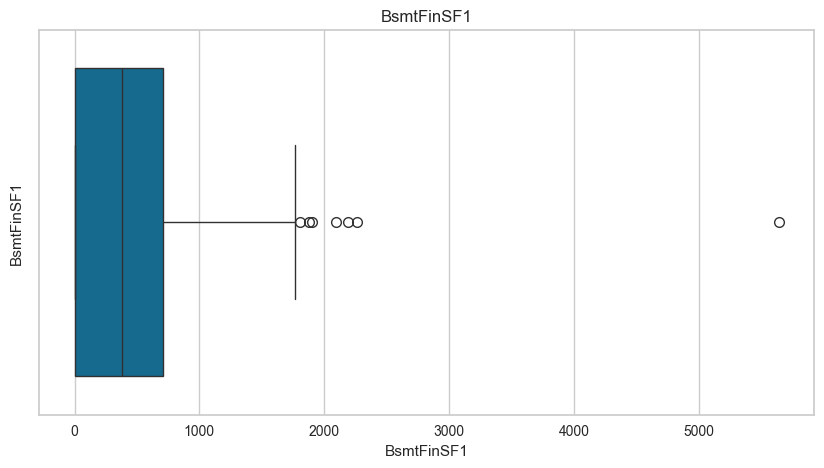

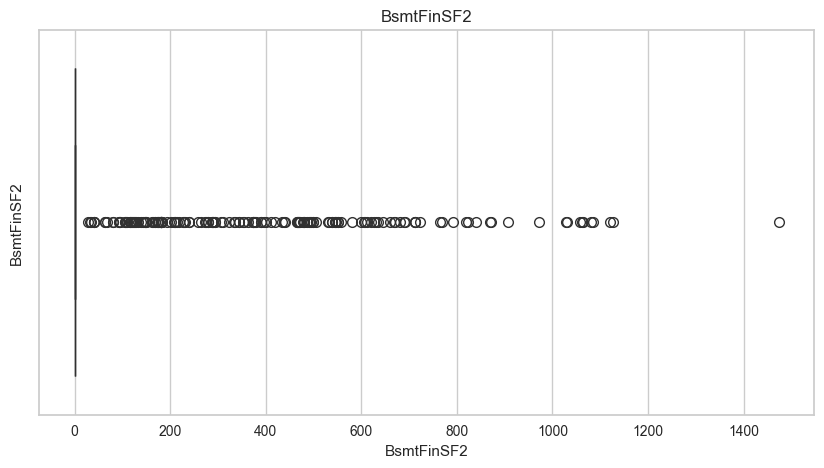

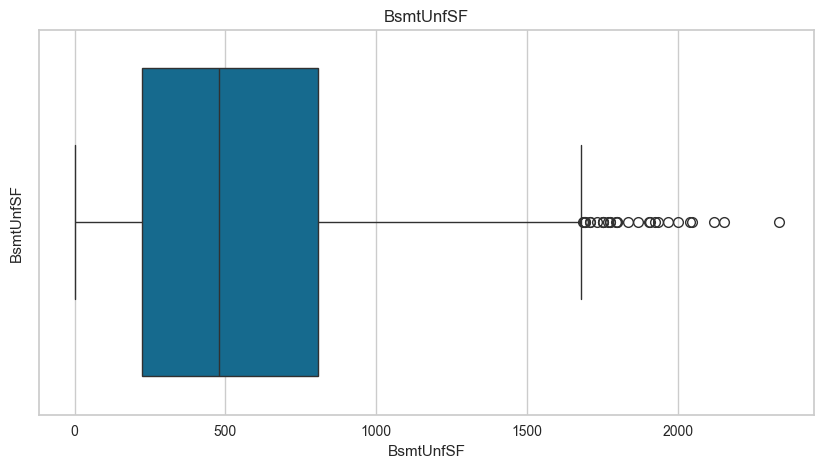

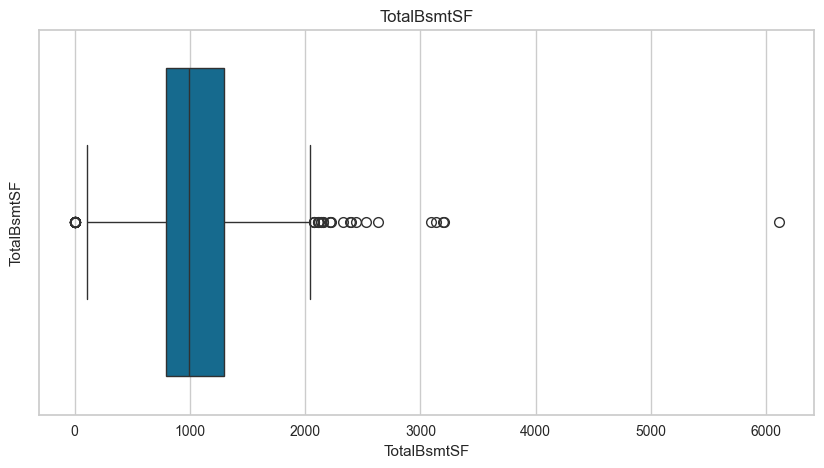

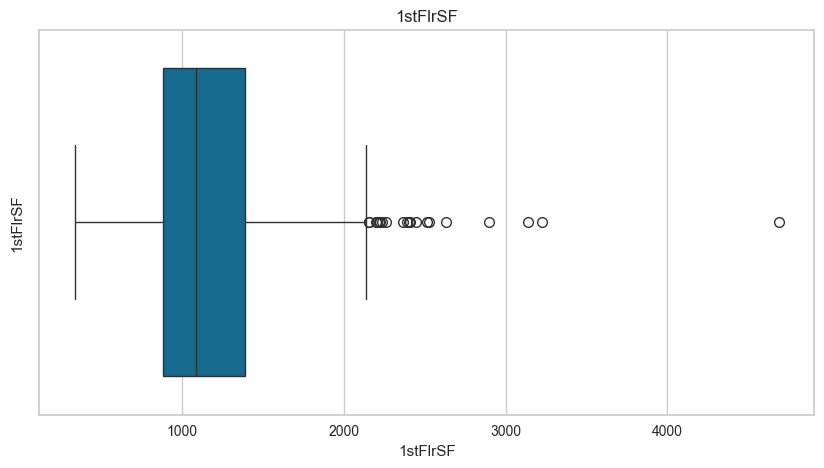

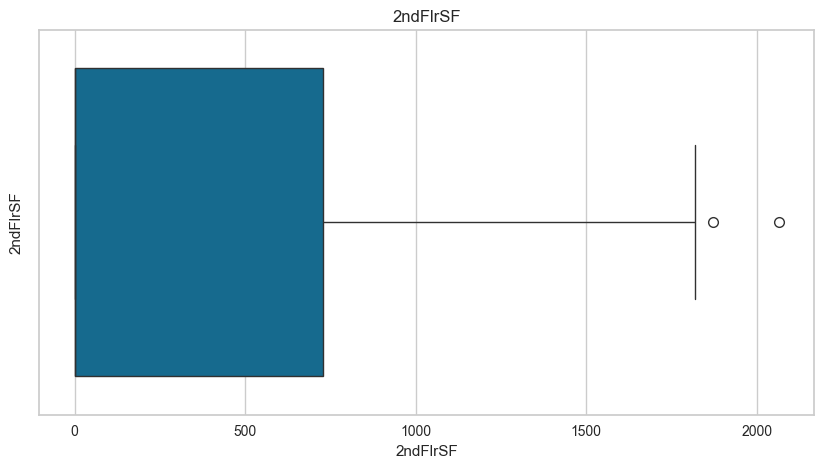

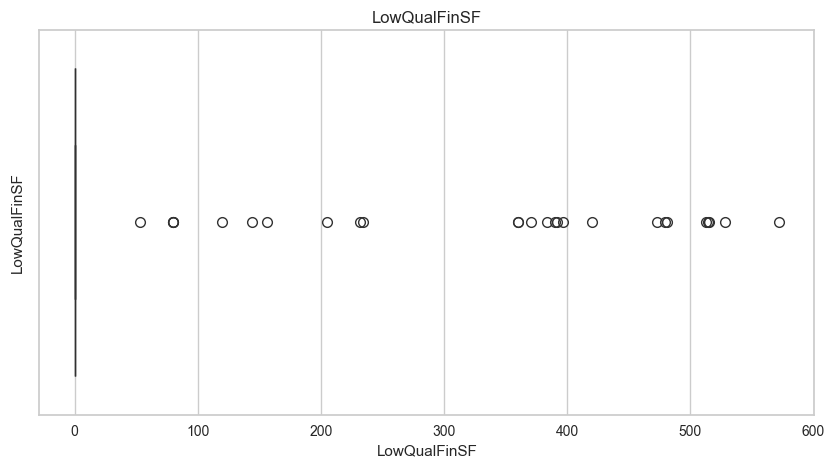

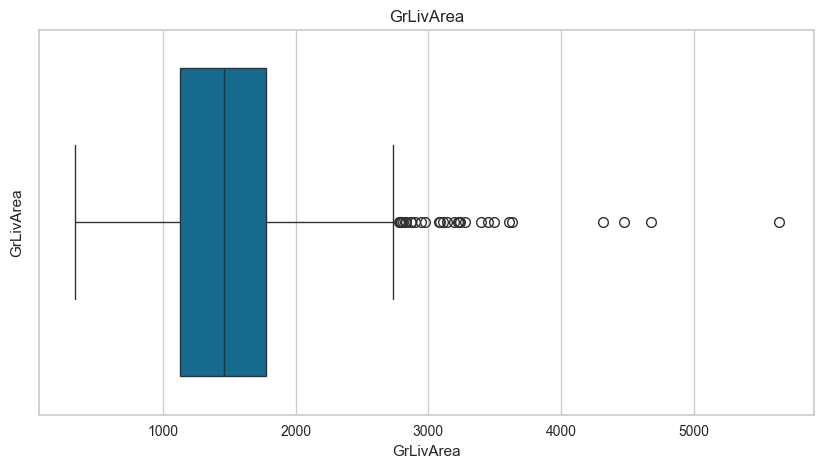

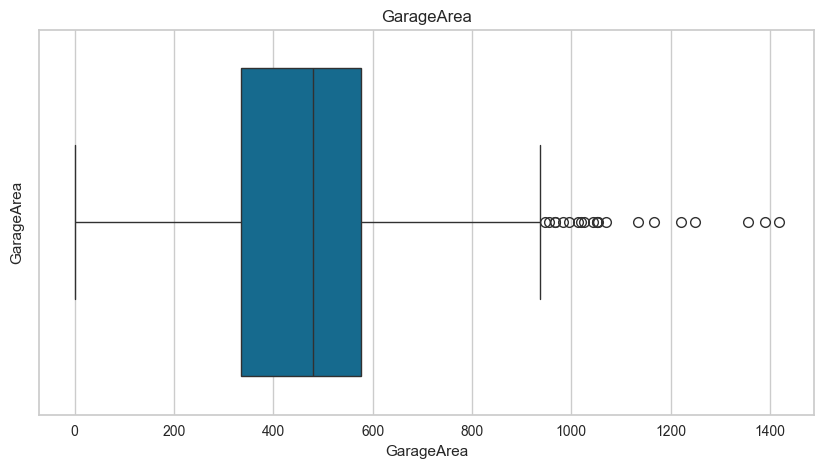

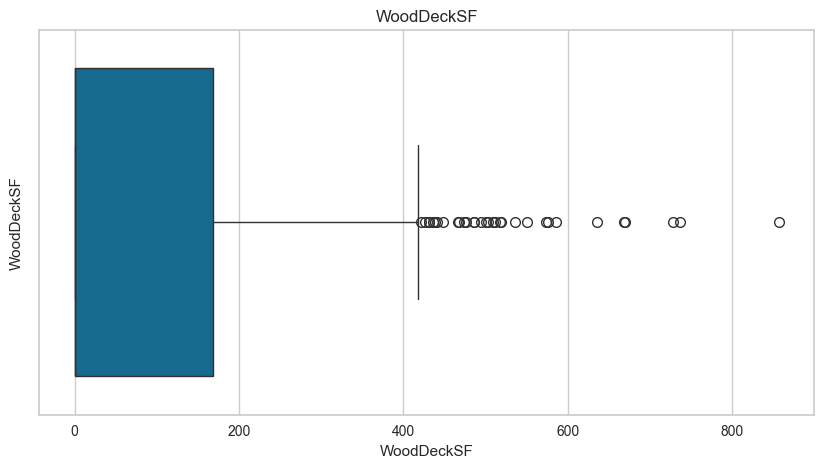

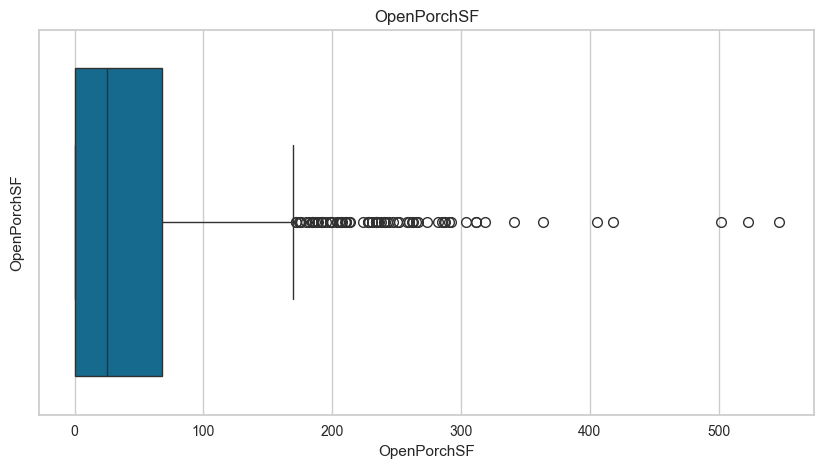

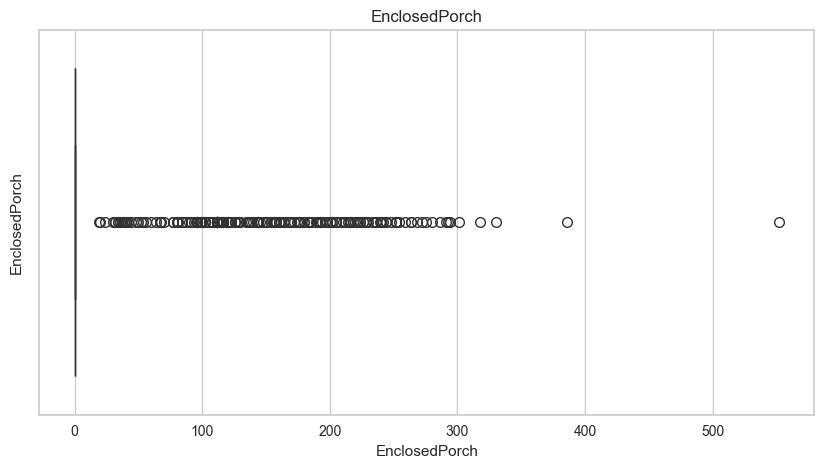

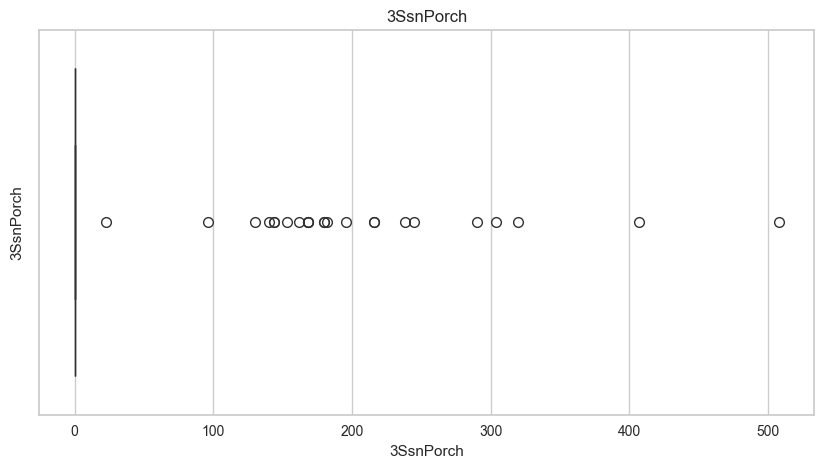

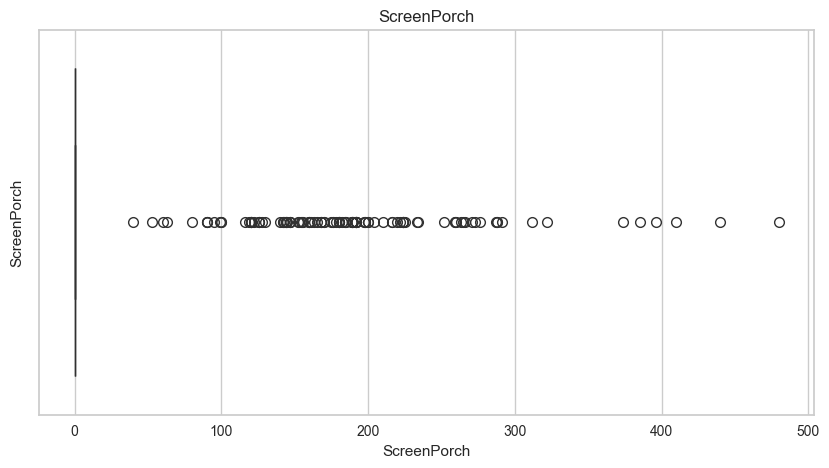

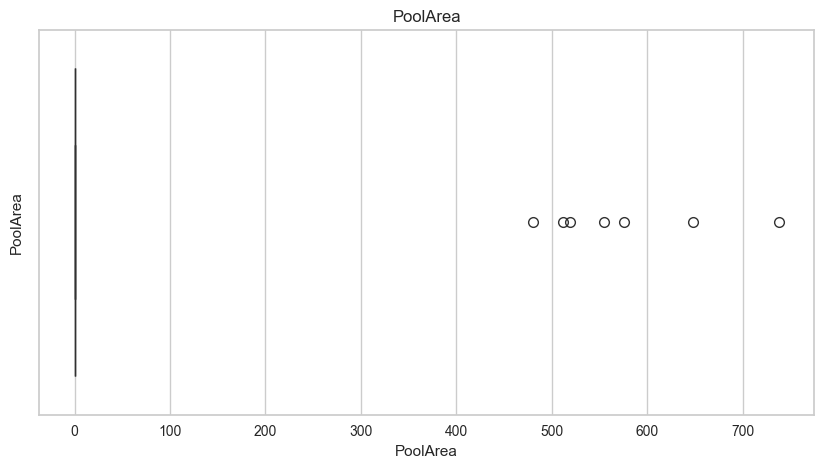

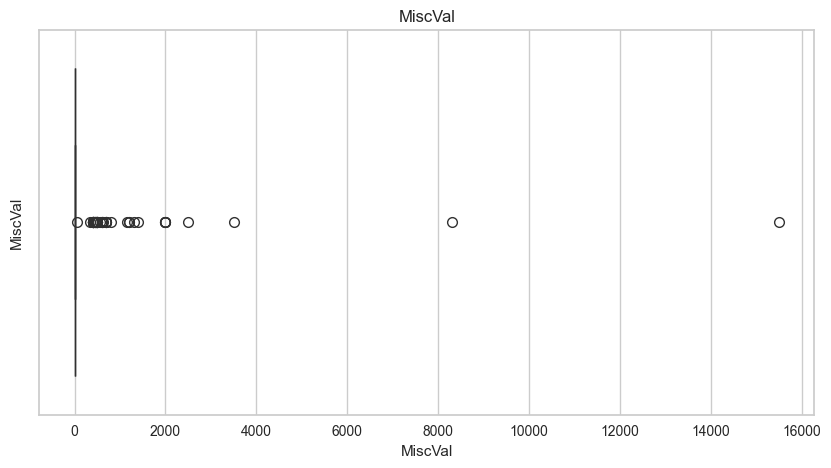

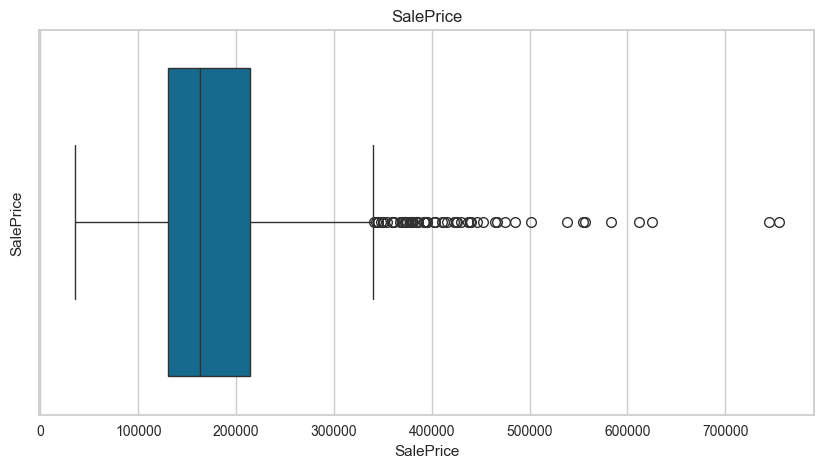

In [128]:
plt.rcParams["figure.figsize"] = (10, 5)

data=dataset.copy()

for feature in continuous_feature:
    # data.boxplot(column=feature)
    sns.boxplot(data[feature], orient='h')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

### Outlier larımızı max ve min a baskılayalım

In [129]:
# Her bir sürekli numerik değişken için outlier'ları baskılayan bir for döngüsü
for column in continuous_feature:
    # Alt ve üst sınırları belirleyin (örneğin, 5. ve 95. percentil)
    q1 = dataset[column].quantile(0.25)
    q3 = dataset[column].quantile(0.75)

    IQR = q3 - q1

    lower_limit = q1 - 1.5*IQR
    upper_limit = q3 + 1.5*IQR

    # print(column, lower_limit, upper_limit)

    # # Alt sınırdan küçük olan değerleri alt sınıra eşitle
    dataset[column] = dataset[column].apply(lambda x: lower_limit if x < lower_limit else x)
    
    # Üst sınırdan büyük olan değerleri üst sınıra eşitle
    dataset[column] = dataset[column].apply(lambda x: upper_limit if x > upper_limit else x)

# Sonuçları göster
dataset[continuous_feature].head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
0,65.0,8450.0,5.0,5,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,208500.0
1,80.0,9600.0,31.0,31,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,181500.0
2,68.0,11250.0,7.0,6,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,223500.0
3,60.0,9550.0,91.0,36,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,642.0,0.0,35.0,0.0,0.0,0.0,0.0,0.0,140000.0
4,84.0,14260.0,8.0,8,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,250000.0


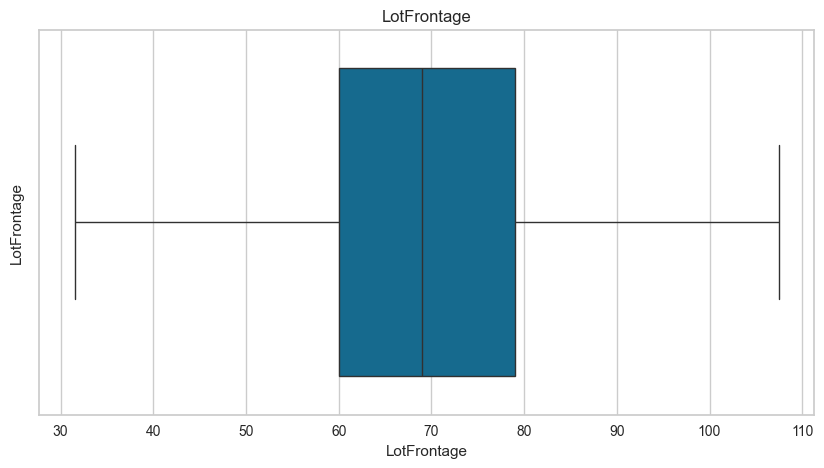

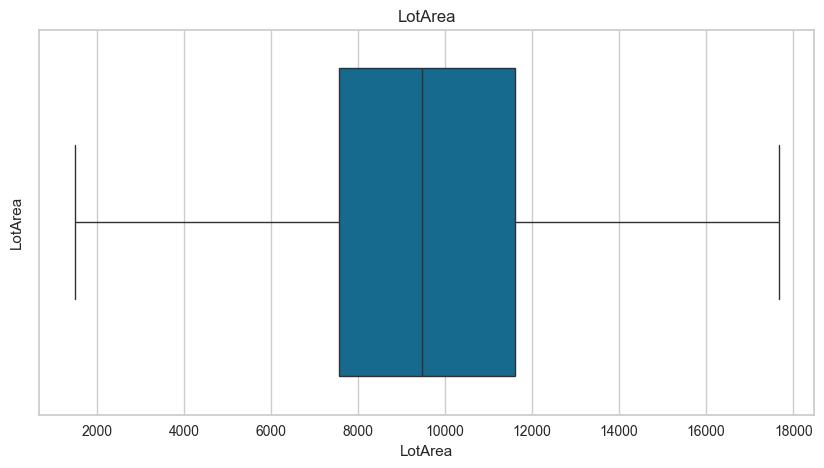

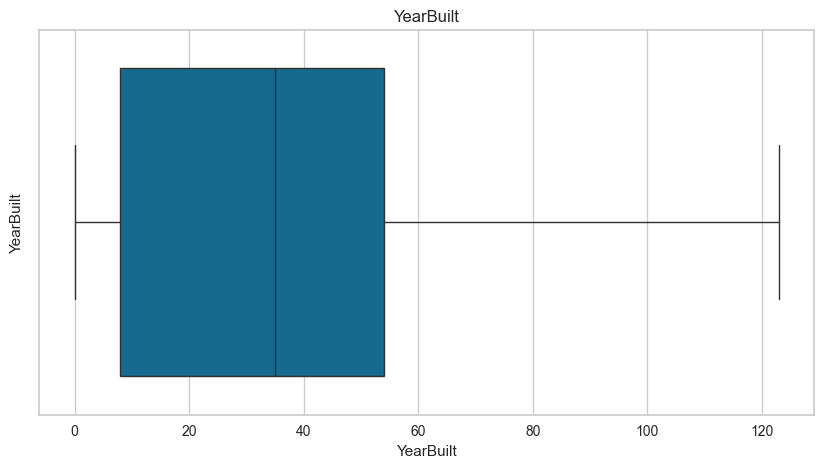

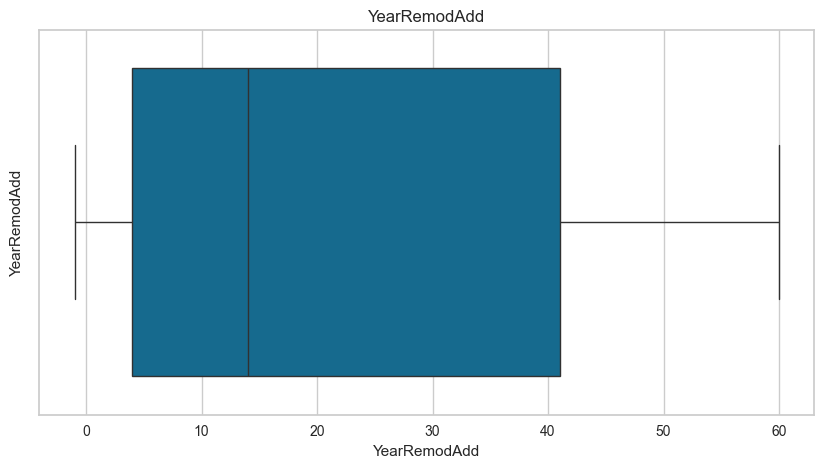

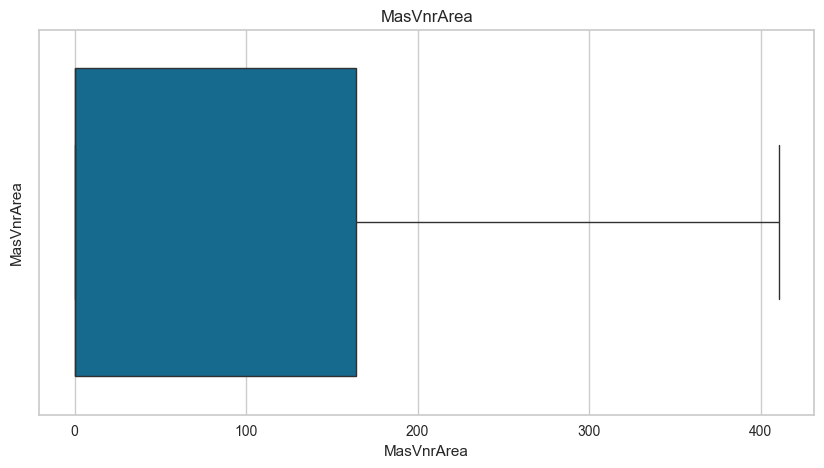

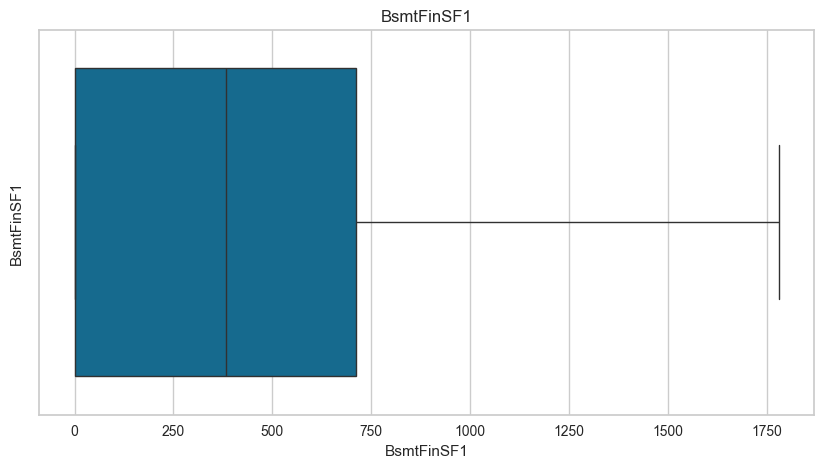

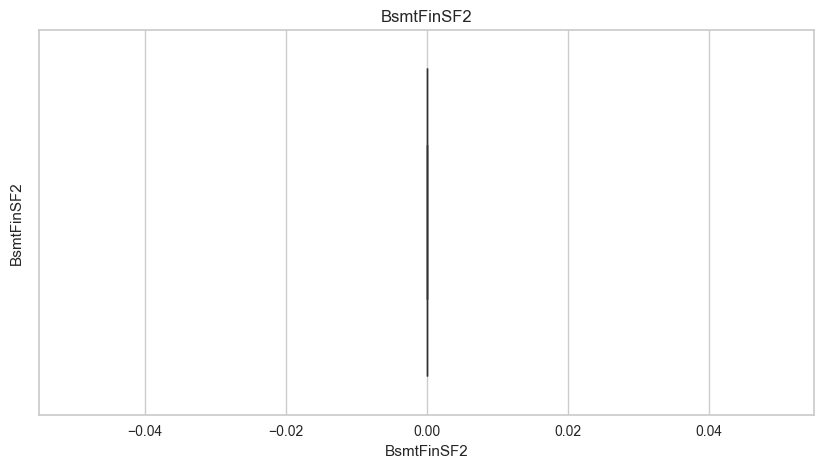

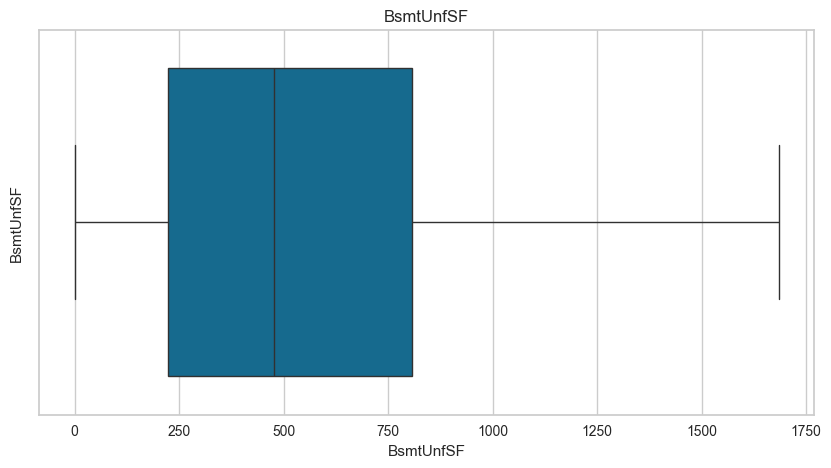

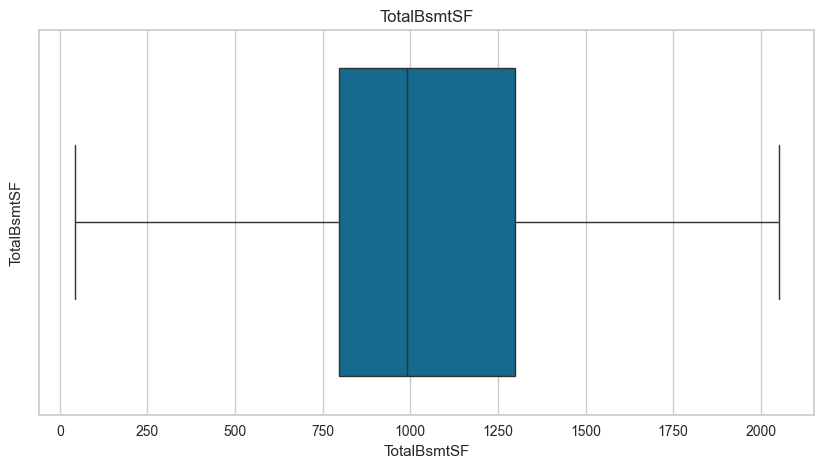

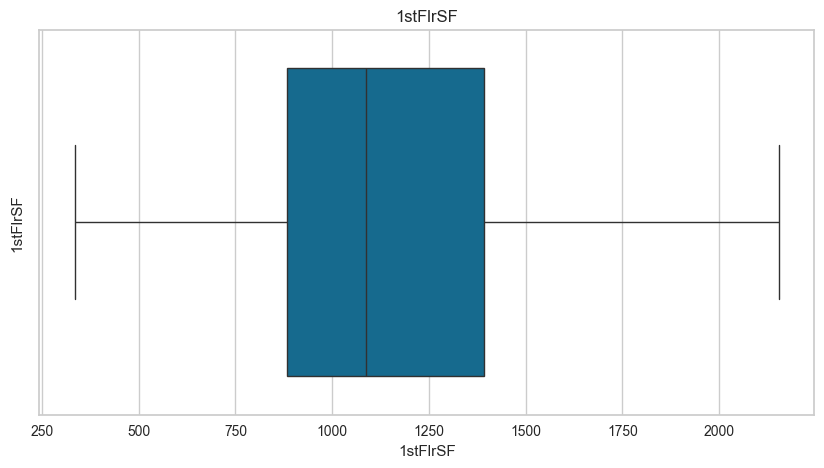

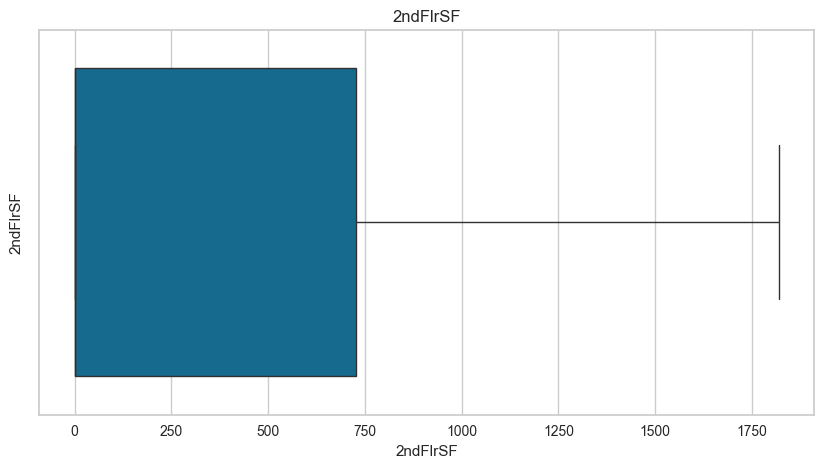

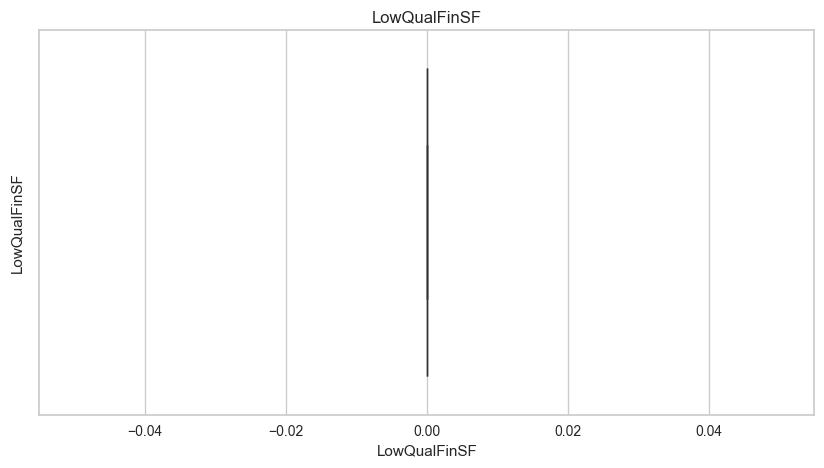

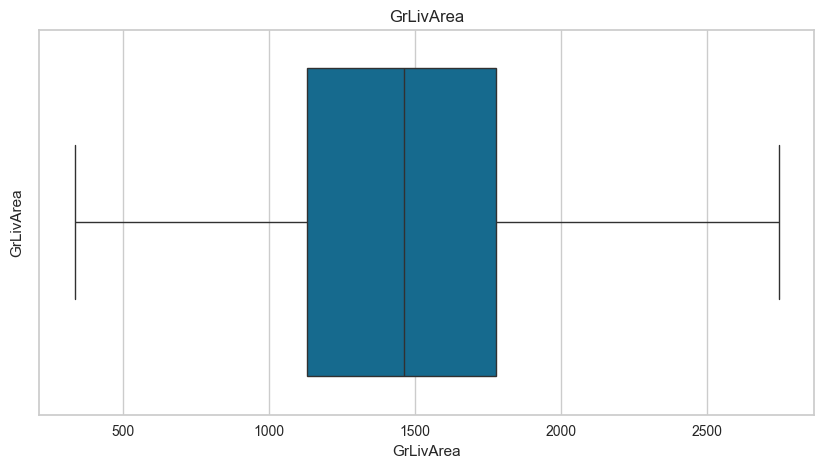

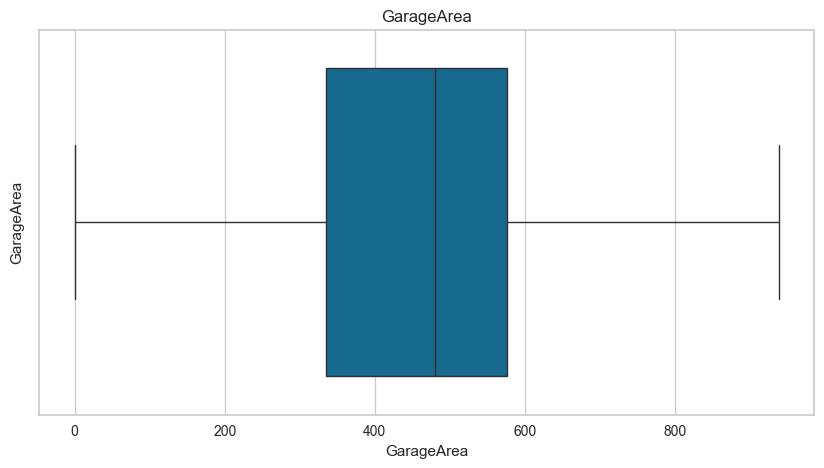

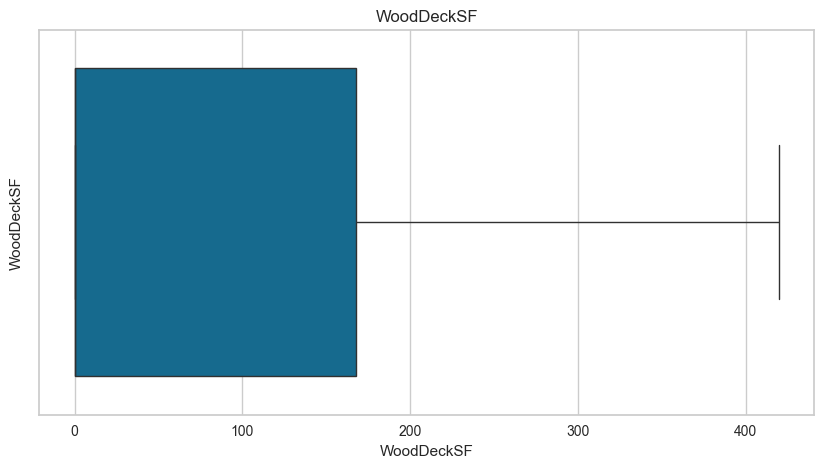

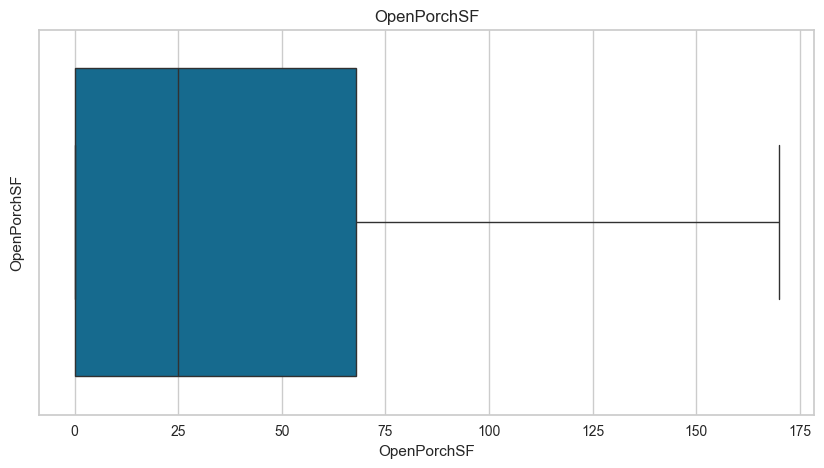

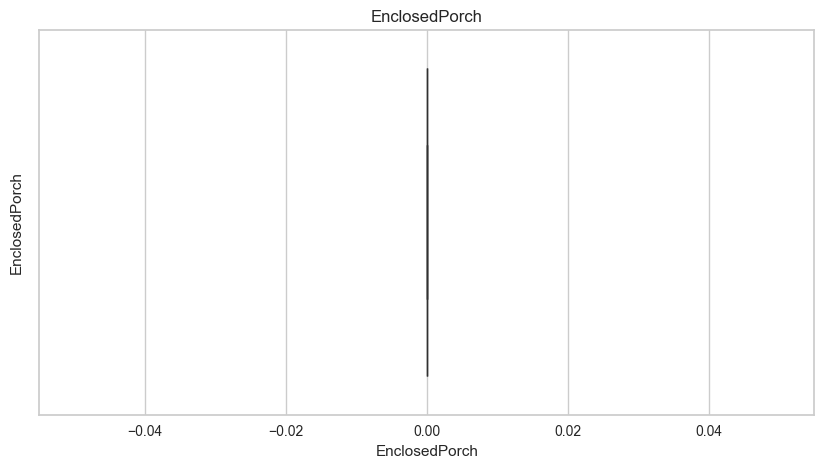

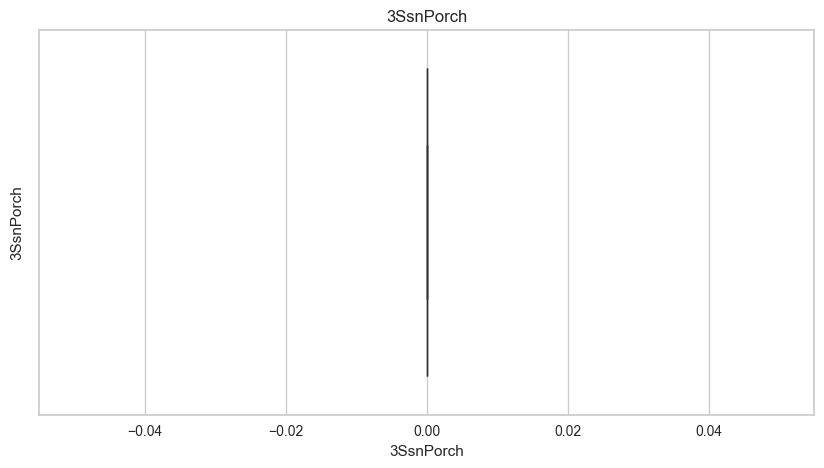

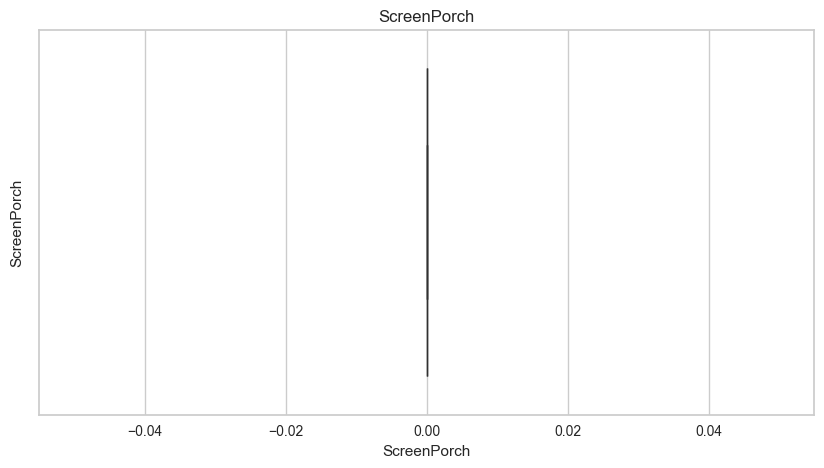

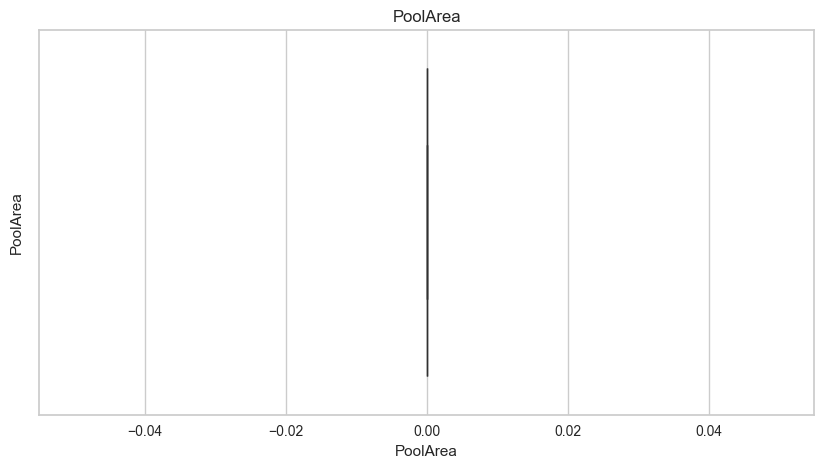

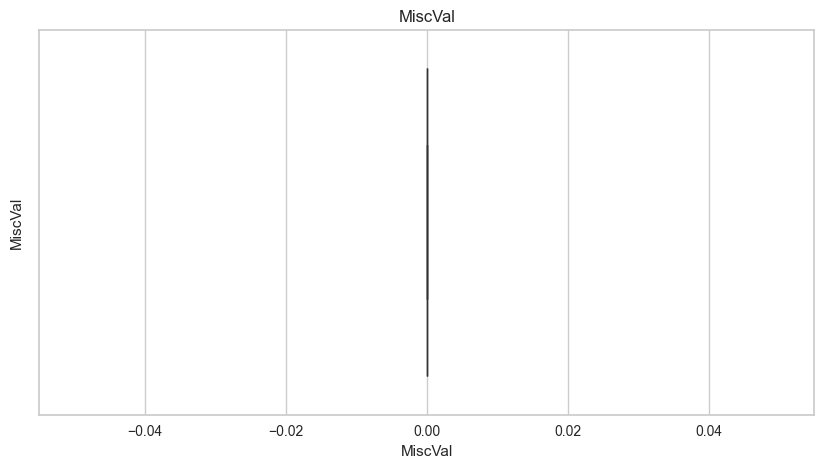

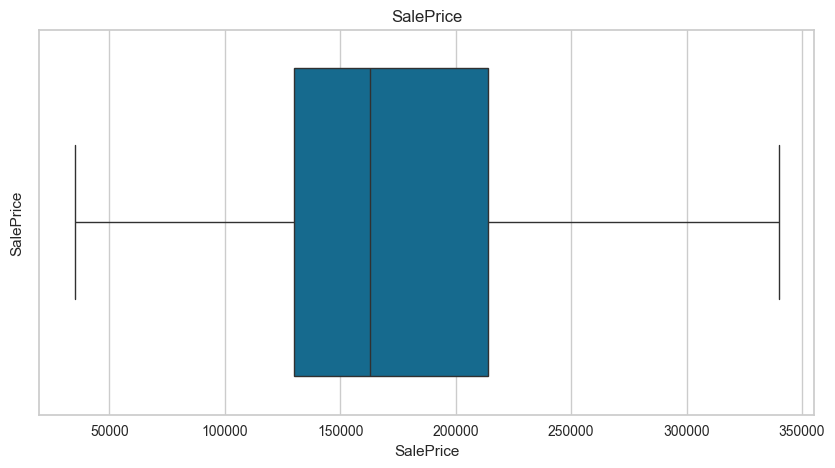

In [130]:
for feature in continuous_feature:
    # data.boxplot(column=feature)
    sns.boxplot(dataset[feature], orient='h')
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## Encoding

In [131]:
len(categorical_features)

44

In [132]:
dataset[categorical_features].head()

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
1,20,RL,Pave,NA,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NA,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
2,60,RL,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal
3,70,RL,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NA,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NA,NA,NA,WD,Abnorml
4,60,RL,Pave,NA,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NA,NA,NA,WD,Normal


### One-Hot Encoding

In [133]:

# Assuming 'dataset' is your DataFrame
dataset = pd.get_dummies(dataset, drop_first=True, columns=['CentralAir', 'Street', 'PavedDrive', 'LandSlope'])

dataset.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,60,RL,65.0,8450.0,NA,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,5.0,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,SBrkr,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,5.0,RFn,2,548.0,TA,TA,0.0,61.0,0.0,0.0,0.0,0.0,NA,NA,NA,0.0,2,2008,WD,Normal,208500.0,True,True,False,True,False,False
1,20,RL,80.0,9600.0,NA,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,31.0,31,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,SBrkr,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460.0,TA,TA,298.0,0.0,0.0,0.0,0.0,0.0,NA,NA,NA,0.0,5,2007,WD,Normal,181500.0,True,True,False,True,False,False
2,60,RL,68.0,11250.0,NA,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,7.0,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,SBrkr,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608.0,TA,TA,0.0,42.0,0.0,0.0,0.0,0.0,NA,NA,NA,0.0,9,2008,WD,Normal,223500.0,True,True,False,True,False,False
3,70,RL,60.0,9550.0,NA,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,91.0,36,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,SBrkr,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642.0,TA,TA,0.0,35.0,0.0,0.0,0.0,0.0,NA,NA,NA,0.0,2,2006,WD,Abnorml,140000.0,True,True,False,True,False,False
4,60,RL,84.0,14260.0,NA,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,8.0,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,SBrkr,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836.0,TA,TA,192.0,84.0,0.0,0.0,0.0,0.0,NA,NA,NA,0.0,12,2008,WD,Normal,250000.0,True,True,False,True,False,False


In [134]:
# Change True and False values ​​to 1 and 0
dataset['CentralAir_Y'] = dataset['CentralAir_Y'].replace({True: 1, False: 0})
dataset['Street_Pave'] = dataset['Street_Pave'].replace({True: 1, False: 0})
dataset['PavedDrive_P'] = dataset['PavedDrive_P'].replace({True: 1, False: 0})
dataset['PavedDrive_Y'] = dataset['PavedDrive_Y'].replace({True: 1, False: 0})
dataset['LandSlope_Mod'] = dataset['LandSlope_Mod'].replace({True: 1, False: 0})
dataset['LandSlope_Sev'] = dataset['LandSlope_Sev'].replace({True: 1, False: 0})
# Display the modified DataFrame
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,60,RL,65.0,8450.0,NA,Reg,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,5.0,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,SBrkr,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,Gd,8,Typ,0,NA,Attchd,5.0,RFn,2,548.0,TA,TA,0.0,61.0,0.0,0.0,0.0,0.0,NA,NA,NA,0.0,2,2008,WD,Normal,208500.0,1,1,0,1,0,0
1,20,RL,80.0,9600.0,NA,Reg,Lvl,AllPub,FR2,Veenker,Feedr,Norm,1Fam,1Story,6,8,31.0,31,Gable,CompShg,MetalSd,MetalSd,NA,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,SBrkr,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2,460.0,TA,TA,298.0,0.0,0.0,0.0,0.0,0.0,NA,NA,NA,0.0,5,2007,WD,Normal,181500.0,1,1,0,1,0,0
2,60,RL,68.0,11250.0,NA,IR1,Lvl,AllPub,Inside,CollgCr,Norm,Norm,1Fam,2Story,7,5,7.0,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,SBrkr,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2,608.0,TA,TA,0.0,42.0,0.0,0.0,0.0,0.0,NA,NA,NA,0.0,9,2008,WD,Normal,223500.0,1,1,0,1,0,0
3,70,RL,60.0,9550.0,NA,IR1,Lvl,AllPub,Corner,Crawfor,Norm,Norm,1Fam,2Story,7,5,91.0,36,Gable,CompShg,Wd Sdng,Wd Shng,NA,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,SBrkr,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3,642.0,TA,TA,0.0,35.0,0.0,0.0,0.0,0.0,NA,NA,NA,0.0,2,2006,WD,Abnorml,140000.0,1,1,0,1,0,0
4,60,RL,84.0,14260.0,NA,IR1,Lvl,AllPub,FR2,NoRidge,Norm,Norm,1Fam,2Story,8,5,8.0,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,SBrkr,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3,836.0,TA,TA,192.0,84.0,0.0,0.0,0.0,0.0,NA,NA,NA,0.0,12,2008,WD,Normal,250000.0,1,1,0,1,0,0


### Label Encoding

In [135]:
from sklearn.preprocessing import LabelEncoder

# Replace 'NAType' with NaN
dataset.replace('NAType', pd.NA, inplace=True)
# Columns to encode
columns_to_encode = ['GarageQual', 'GarageCond', 'ExterQual', 'ExterCond', 'HeatingQC', 
                     'KitchenQual', 'PoolQC', 'BsmtQual', 'BsmtCond', 'FireplaceQu']

# Initialize LabelEncoder
le = LabelEncoder()

# Encode each column using LabelEncoder
for col in columns_to_encode:
    dataset[col] = le.fit_transform(dataset[col].astype(str))

# Now, df contains the encoded values


In [136]:
# Create a dictionary to store the mapping of encoded values to original categories
encoding_mapping = {}

# Loop through the columns and get the mapping
for col in columns_to_encode:
    encoding_mapping[col] = dict(zip(le.transform(le.classes_), le.classes_))

# Print the encoding mapping for each column
for col in columns_to_encode:
    print(f"Encoding mapping for '{col}':")
    print(encoding_mapping[col])


Encoding mapping for 'GarageQual':
{0: 'Ex', 1: 'Fa', 2: 'Gd', 3: 'NA', 4: 'Po', 5: 'TA'}
Encoding mapping for 'GarageCond':
{0: 'Ex', 1: 'Fa', 2: 'Gd', 3: 'NA', 4: 'Po', 5: 'TA'}
Encoding mapping for 'ExterQual':
{0: 'Ex', 1: 'Fa', 2: 'Gd', 3: 'NA', 4: 'Po', 5: 'TA'}
Encoding mapping for 'ExterCond':
{0: 'Ex', 1: 'Fa', 2: 'Gd', 3: 'NA', 4: 'Po', 5: 'TA'}
Encoding mapping for 'HeatingQC':
{0: 'Ex', 1: 'Fa', 2: 'Gd', 3: 'NA', 4: 'Po', 5: 'TA'}
Encoding mapping for 'KitchenQual':
{0: 'Ex', 1: 'Fa', 2: 'Gd', 3: 'NA', 4: 'Po', 5: 'TA'}
Encoding mapping for 'PoolQC':
{0: 'Ex', 1: 'Fa', 2: 'Gd', 3: 'NA', 4: 'Po', 5: 'TA'}
Encoding mapping for 'BsmtQual':
{0: 'Ex', 1: 'Fa', 2: 'Gd', 3: 'NA', 4: 'Po', 5: 'TA'}
Encoding mapping for 'BsmtCond':
{0: 'Ex', 1: 'Fa', 2: 'Gd', 3: 'NA', 4: 'Po', 5: 'TA'}
Encoding mapping for 'FireplaceQu':
{0: 'Ex', 1: 'Fa', 2: 'Gd', 3: 'NA', 4: 'Po', 5: 'TA'}


### Ordinal Encoding

In [137]:
from sklearn.preprocessing import OrdinalEncoder

# List of columns to encode categorically
columns_to_encode = [
    'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'Fence', 'LotShape', 'MasVnrType',
    'LandContour', 'Utilities', 'GarageFinish', 'MSSubClass', 'MSZoning', 'LotConfig',
    'Neighborhood', 'Condition1', 'Alley', 'Condition2', 'GarageType', 'Functional',
    'SaleCondition', 'SaleType', 'Electrical', 'HouseStyle', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'BldgType', 'MasVnrType', 'Foundation', 'Heating',
    'MiscFeature'
]

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Encode the columns
dataset[columns_to_encode] = encoder.fit_transform(dataset[columns_to_encode].astype(str))

# Create a dictionary to store the mapping of categories to encoded values
encoding_mapping = {}

# Loop through the columns and get the mapping
for column, categories in zip(columns_to_encode, encoder.categories_):
    encoding_mapping[column] = {category: encoded_value for category, encoded_value in zip(categories, range(len(categories)))}

# Print the encoding mapping for 'GarageType'
print("Encoding mapping for 'GarageType':")
print(encoding_mapping['GarageType'])



Encoding mapping for 'GarageType':
{'2Types': 0, 'Attchd': 1, 'Basment': 2, 'BuiltIn': 3, 'CarPort': 4, 'Detchd': 5, 'NA': 6}


In [138]:
# Print the encoding mapping for 'LandContour'
print("Encoding mapping for 'LandContour':")
print(encoding_mapping['LandContour'])

Encoding mapping for 'LandContour':
{'Bnk': 0, 'HLS': 1, 'Low': 2, 'Lvl': 3}


In [55]:
'''from sklearn.preprocessing import OrdinalEncoder

# List of columns to encode categorically
columns_to_encode = [
    'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'Fence', 'LotShape', 'MasVnrType',
    'LandContour', 'Utilities', 'GarageFinish', 'MSSubClass', 'MSZoning', 'LotConfig',
    'Neighborhood', 'Condition1', 'Alley', 'Condition2', 'GarageType', 'Functional',
    'SaleCondition', 'SaleType', 'Electrical', 'HouseStyle', 'RoofStyle', 'RoofMatl',
    'Exterior1st', 'Exterior2nd', 'BldgType', 'MasVnrType', 'Foundation', 'Heating',
    'MiscFeature'
]

# Initialize OrdinalEncoder
encoder = OrdinalEncoder()

# Encode the columns
dataset[columns_to_encode] = encoder.fit_transform(dataset[columns_to_encode].astype(str))'''



"from sklearn.preprocessing import OrdinalEncoder\n\n# List of columns to encode categorically\ncolumns_to_encode = [\n    'BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'Fence', 'LotShape', 'MasVnrType',\n    'LandContour', 'Utilities', 'GarageFinish', 'MSSubClass', 'MSZoning', 'LotConfig',\n    'Neighborhood', 'Condition1', 'Alley', 'Condition2', 'GarageType', 'Functional',\n    'SaleCondition', 'SaleType', 'Electrical', 'HouseStyle', 'RoofStyle', 'RoofMatl',\n    'Exterior1st', 'Exterior2nd', 'BldgType', 'MasVnrType', 'Foundation', 'Heating',\n    'MiscFeature'\n]\n\n# Initialize OrdinalEncoder\nencoder = OrdinalEncoder()\n\n# Encode the columns\ndataset[columns_to_encode] = encoder.fit_transform(dataset[columns_to_encode].astype(str))"

In [56]:
'''for col in ['GarageType']:
    print(col, dataset.groupby([col])['SalePrice'].mean().sort_values())
    ordinal_labels = dataset.groupby([col])['SalePrice'].mean().sort_values().index
    print(ordinal_labels)
    ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,1)}
    print(ordinal_labels2)
    dataset[col]=dataset[col].map(ordinal_labels2)'''

"for col in ['GarageType']:\n    print(col, dataset.groupby([col])['SalePrice'].mean().sort_values())\n    ordinal_labels = dataset.groupby([col])['SalePrice'].mean().sort_values().index\n    print(ordinal_labels)\n    ordinal_labels2 = {k:i for i,k in enumerate(ordinal_labels,1)}\n    print(ordinal_labels2)\n    dataset[col]=dataset[col].map(ordinal_labels2)"

In [57]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,9.0,3.0,65.0,8450.0,1.0,3.0,3.0,0.0,4.0,5.0,2.0,2.0,0.0,5.0,7,5,5.0,5,1.0,1.0,12.0,13.0,1.0,196.0,2,4,2.0,2,4,4.0,2.0,706.0,6.0,0.0,150.0,856.0,1.0,0,4.0,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,2,8,6.0,0,3,1.0,5.0,2.0,2,548.0,5,5,0.0,61.0,0.0,0.0,0.0,0.0,3,4.0,1.0,0.0,2,2008,8.0,4.0,208500.0,1,1,0,1,0,0
1,4.0,3.0,80.0,9600.0,1.0,3.0,3.0,0.0,2.0,24.0,1.0,2.0,0.0,2.0,6,8,31.0,31,1.0,1.0,8.0,8.0,2.0,0.0,3,4,1.0,2,4,1.0,0.0,978.0,6.0,0.0,284.0,1262.0,1.0,0,4.0,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,3,6,6.0,1,5,1.0,31.0,2.0,2,460.0,5,5,298.0,0.0,0.0,0.0,0.0,0.0,3,4.0,1.0,0.0,5,2007,8.0,4.0,181500.0,1,1,0,1,0,0
2,9.0,3.0,68.0,11250.0,1.0,0.0,3.0,0.0,4.0,5.0,2.0,2.0,0.0,5.0,7,5,7.0,6,1.0,1.0,12.0,13.0,1.0,162.0,2,4,2.0,2,4,2.0,2.0,486.0,6.0,0.0,434.0,920.0,1.0,0,4.0,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,2,6,6.0,1,5,1.0,7.0,2.0,2,608.0,5,5,0.0,42.0,0.0,0.0,0.0,0.0,3,4.0,1.0,0.0,9,2008,8.0,4.0,223500.0,1,1,0,1,0,0
3,10.0,3.0,60.0,9550.0,1.0,0.0,3.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7,5,91.0,36,1.0,1.0,13.0,15.0,2.0,0.0,3,4,0.0,4,1,4.0,0.0,216.0,6.0,0.0,540.0,756.0,1.0,2,4.0,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,2,7,6.0,1,2,5.0,8.0,3.0,3,642.0,5,5,0.0,35.0,0.0,0.0,0.0,0.0,3,4.0,1.0,0.0,2,2006,8.0,0.0,140000.0,1,1,0,1,0,0
4,9.0,3.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,15.0,2.0,2.0,0.0,5.0,8,5,8.0,8,1.0,1.0,12.0,13.0,1.0,350.0,2,4,2.0,2,4,0.0,2.0,655.0,6.0,0.0,490.0,1145.0,1.0,0,4.0,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,2,9,6.0,1,5,1.0,8.0,2.0,3,836.0,5,5,192.0,84.0,0.0,0.0,0.0,0.0,3,4.0,1.0,0.0,12,2008,8.0,4.0,250000.0,1,1,0,1,0,0



## Monitoring Distribution and Transformations

In [58]:
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.special import boxcox1p

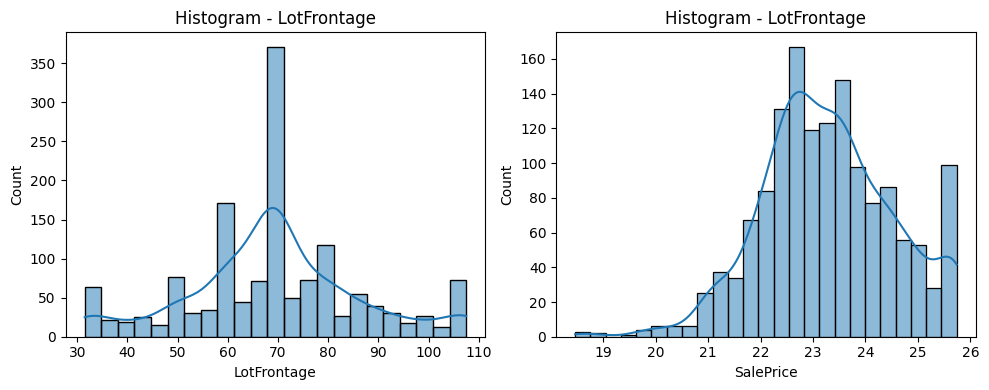

LotFrontage: Skewness: 0.09434622611486461, Kurtosis: 0.19879282642700513


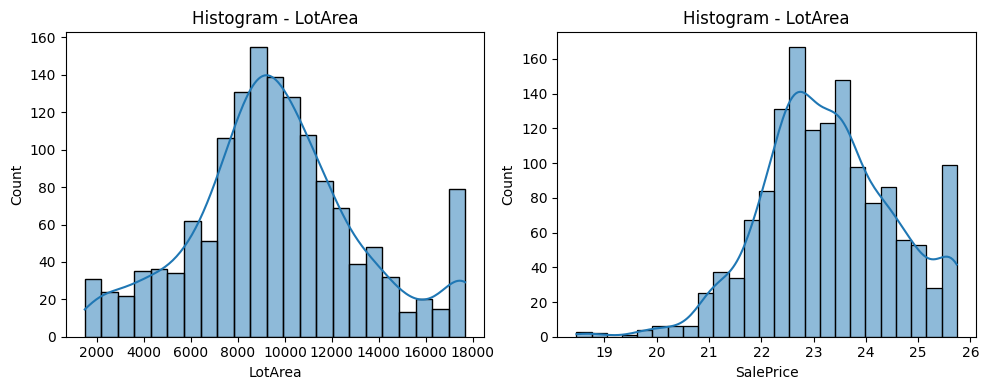

LotArea: Skewness: 0.20827728132424594, Kurtosis: 0.07870867873897414


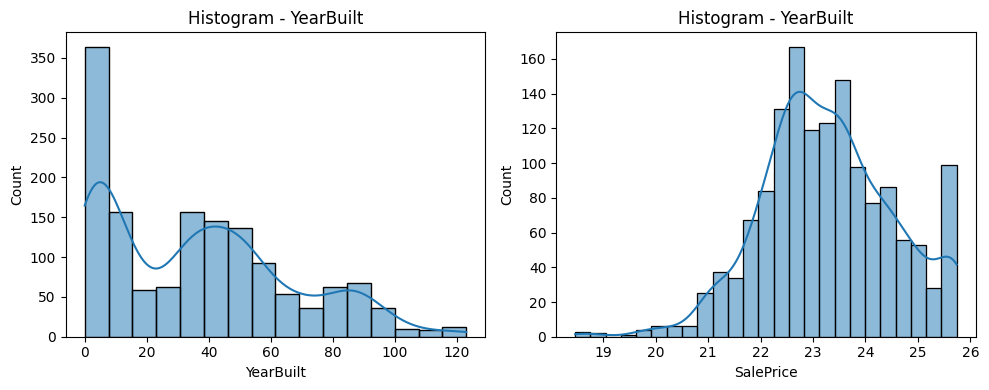

YearBuilt: Skewness: 0.5875579344355812, Kurtosis: -0.524416540707032


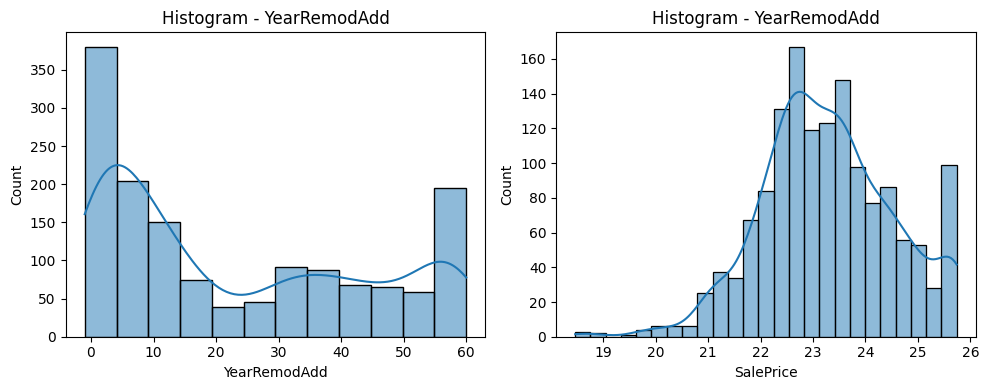

YearRemodAdd: Skewness: 0.5019726289409677, Kurtosis: -1.2658032166945699


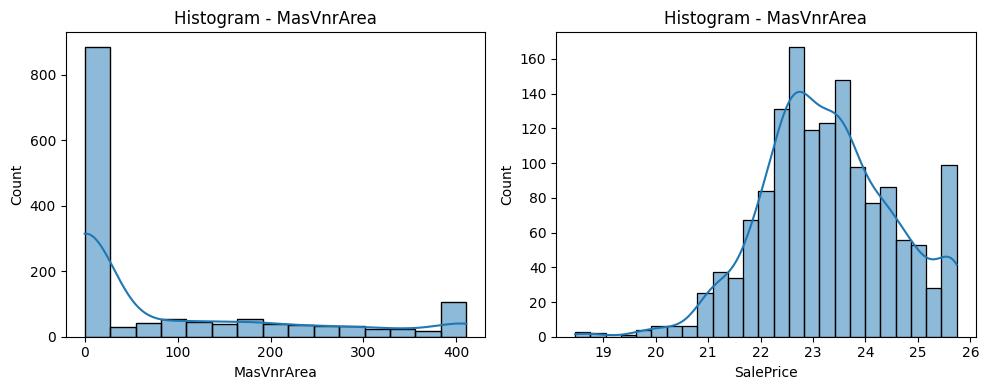

MasVnrArea: Skewness: 1.2864355865199877, Kurtosis: 0.2706548392439738


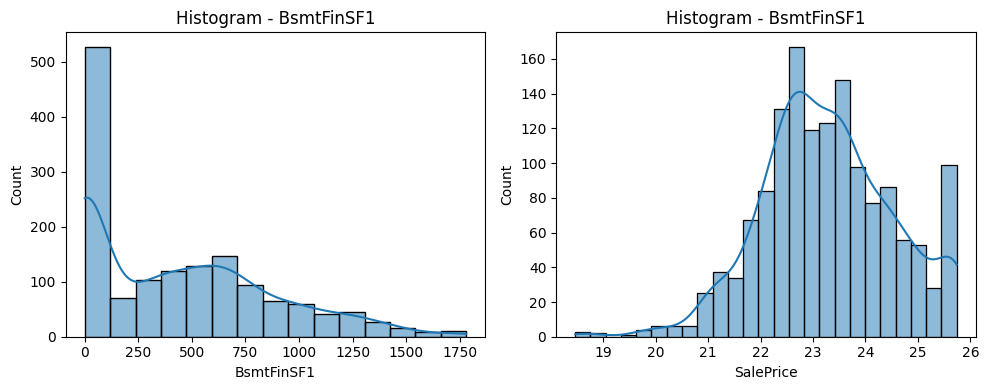

BsmtFinSF1: Skewness: 0.7391163071704993, Kurtosis: -0.264334794462477


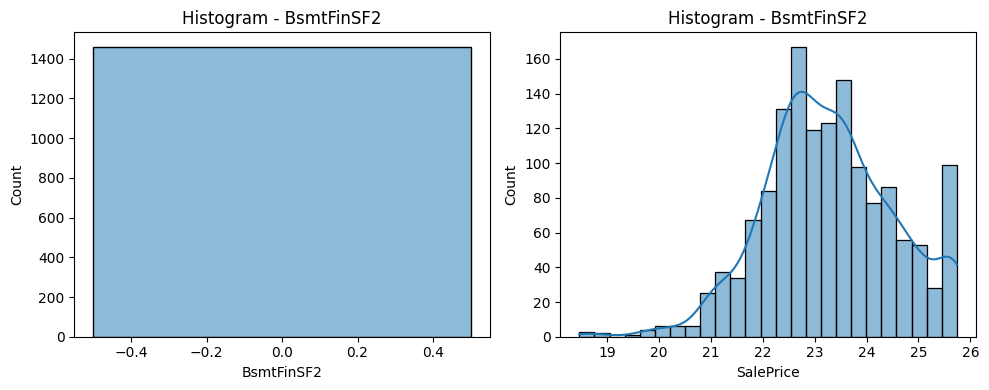

BsmtFinSF2: Skewness: nan, Kurtosis: nan


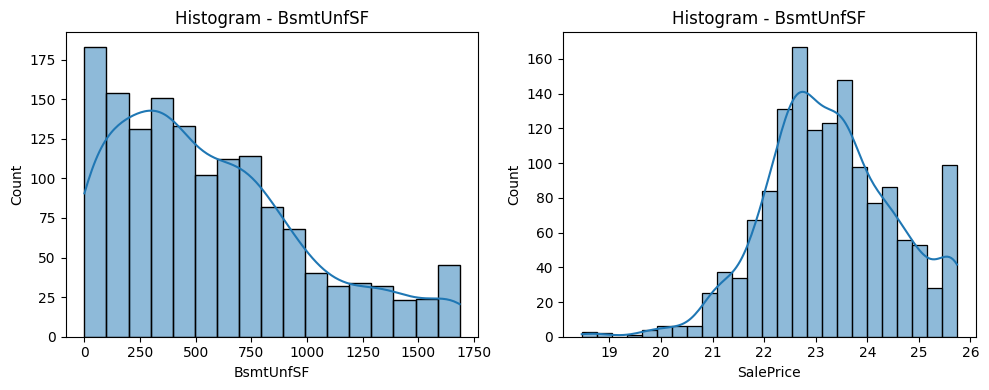

BsmtUnfSF: Skewness: 0.7961115054223044, Kurtosis: -0.03195083124284759


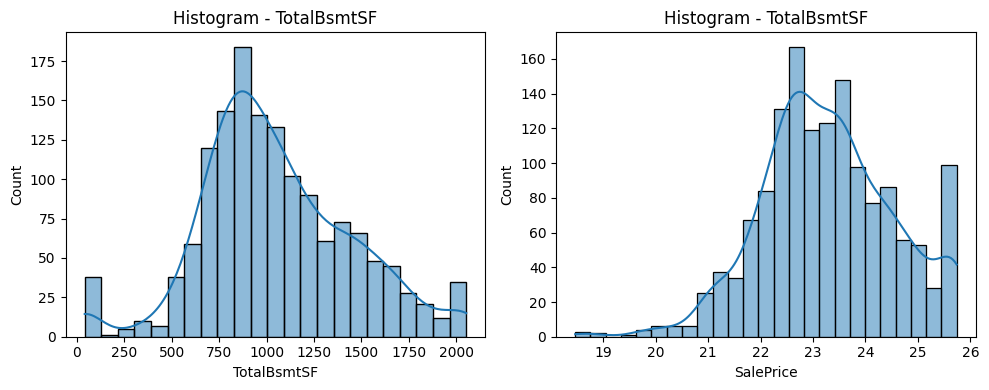

TotalBsmtSF: Skewness: 0.23699598476781025, Kurtosis: 0.29645997938568147


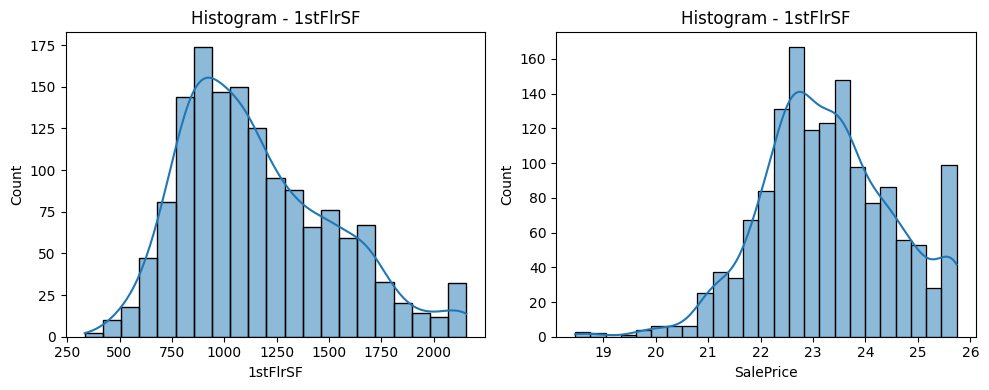

1stFlrSF: Skewness: 0.6634512208818515, Kurtosis: -0.0662065155979632


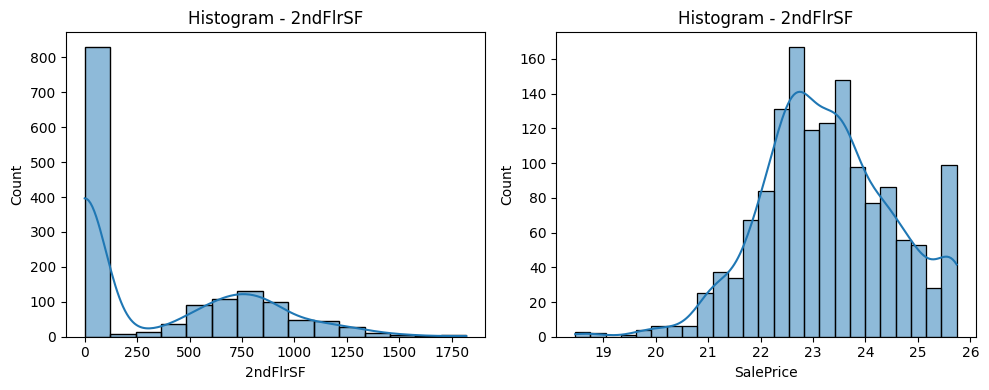

2ndFlrSF: Skewness: 0.7992866952282371, Kurtosis: -0.627077263182862


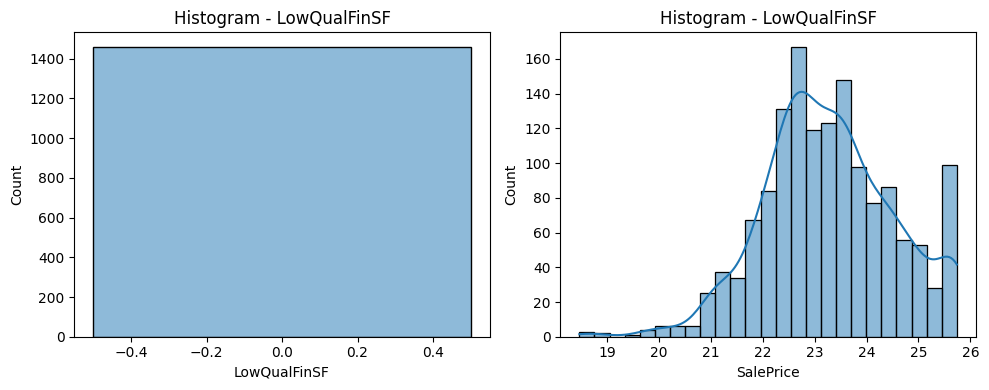

LowQualFinSF: Skewness: nan, Kurtosis: nan


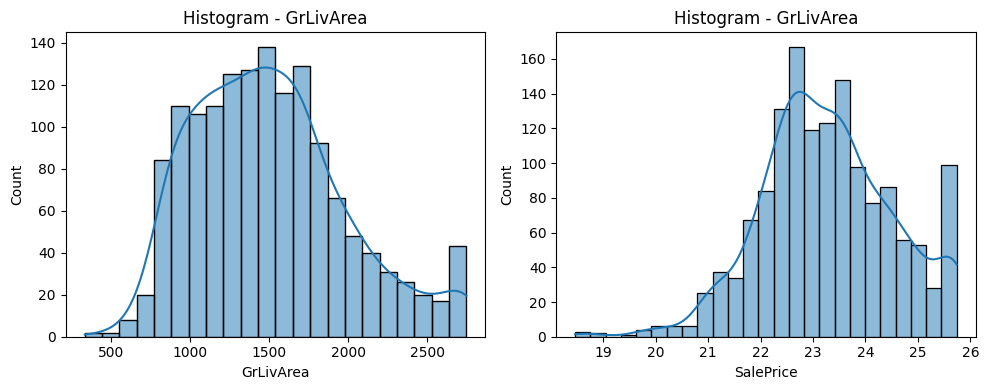

GrLivArea: Skewness: 0.592945842777863, Kurtosis: -0.042438355726702515


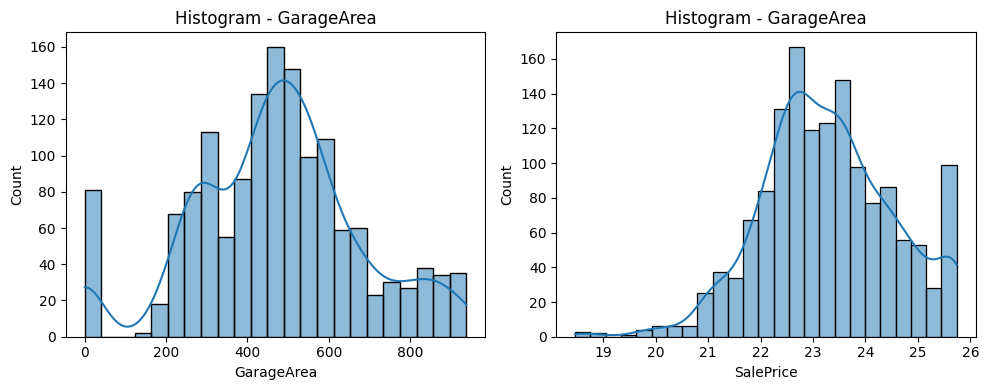

GarageArea: Skewness: -0.06961364495296303, Kurtosis: 0.1596279354152097


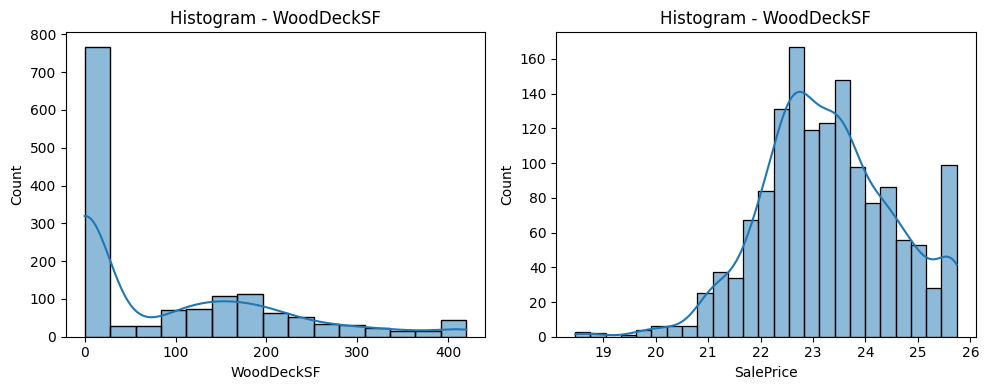

WoodDeckSF: Skewness: 1.0825594119880446, Kurtosis: 0.24288164236100318


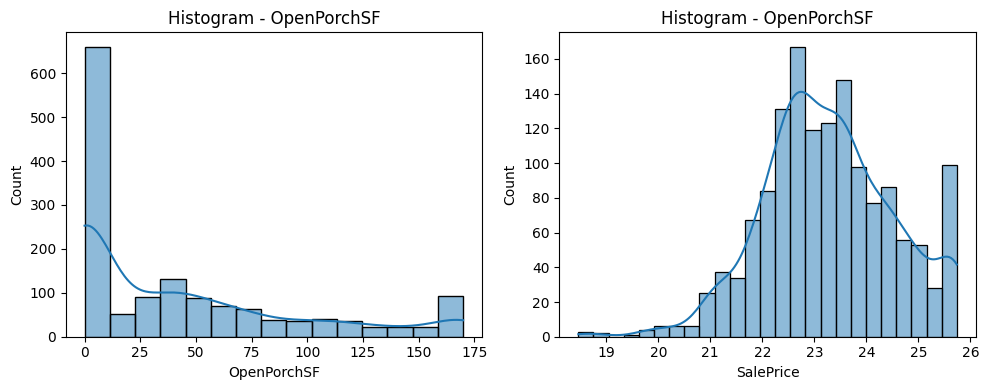

OpenPorchSF: Skewness: 1.1351333618721398, Kurtosis: 0.17325084142687297


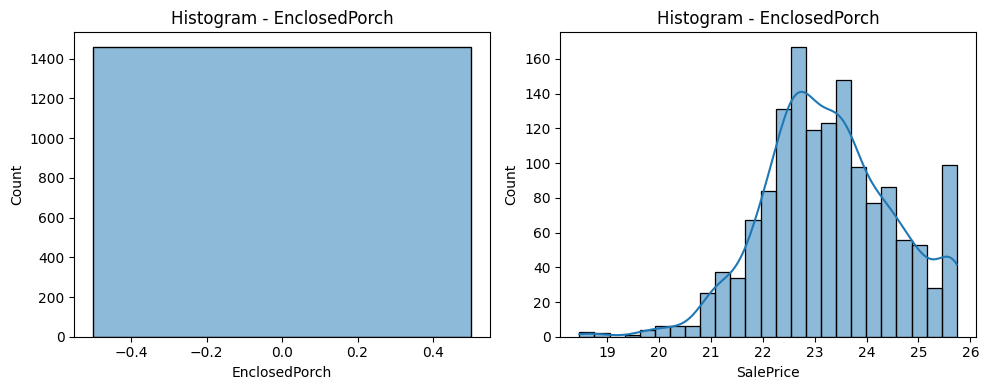

EnclosedPorch: Skewness: nan, Kurtosis: nan


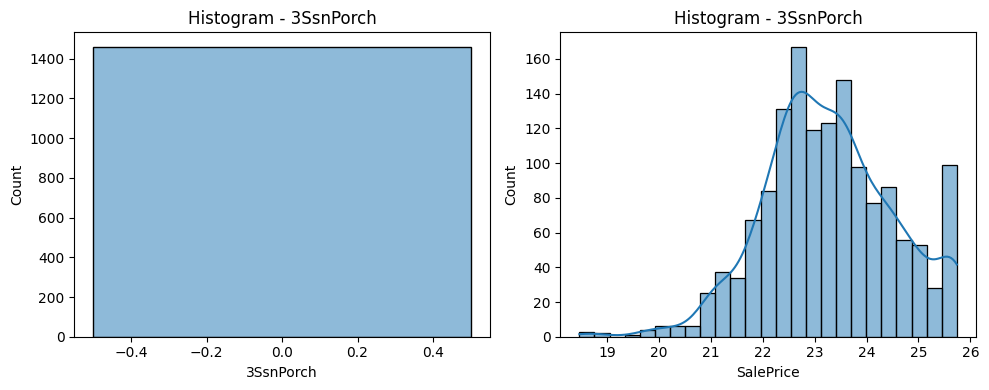

3SsnPorch: Skewness: nan, Kurtosis: nan


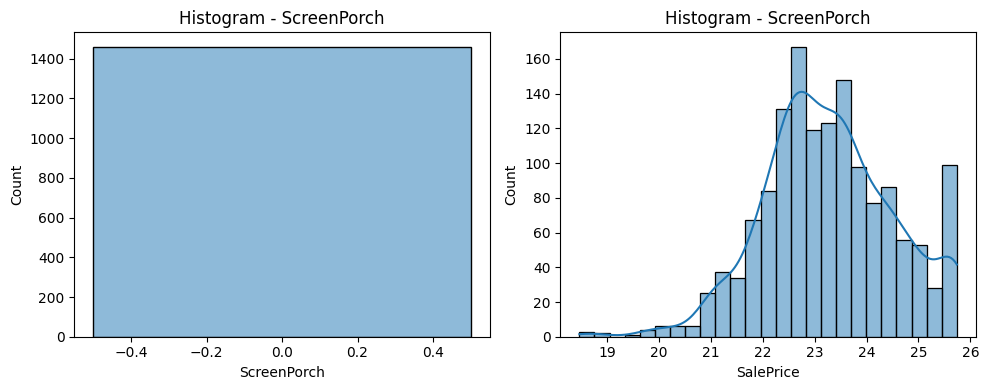

ScreenPorch: Skewness: nan, Kurtosis: nan


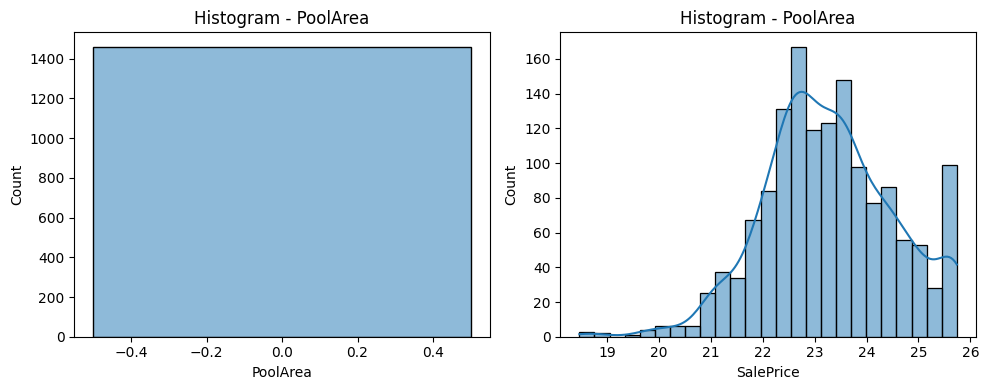

PoolArea: Skewness: nan, Kurtosis: nan


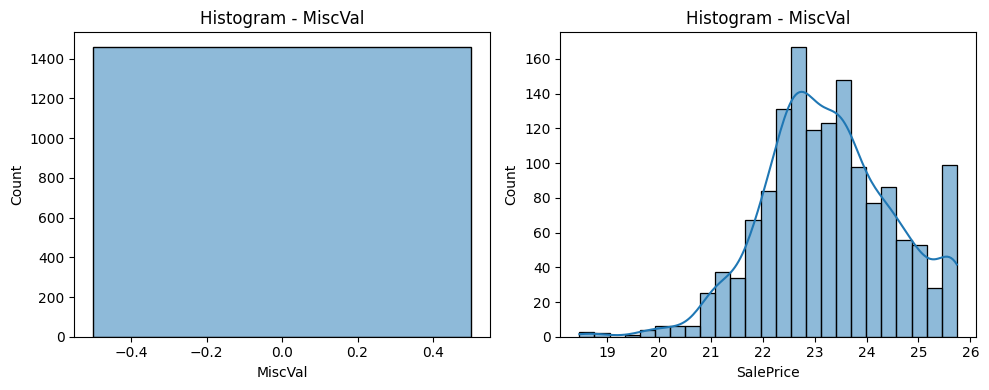

MiscVal: Skewness: nan, Kurtosis: nan


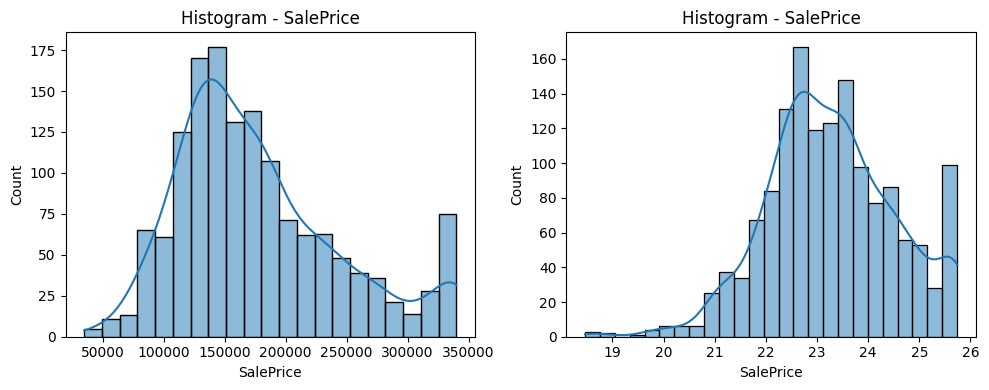

SalePrice: Skewness: 0.801961307169266, Kurtosis: 0.08323777458275483


In [59]:
# Visualize skewness and kurtosis values ​​for each column
for column in dataset[continuous_feature]:
    skewness = skew(dataset[column])
    kurt = kurtosis(dataset[column])

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    sns.histplot(dataset[column], ax=axes[0], kde=True)
    axes[0].set_title(f'Histogram - {column}')

    # sns.histplot(np.log(dataset[column]), ax=axes[1], kde=True)
    # axes[1].set_title(f'Histogram - {column}')

    # sns.histplot(1/dataset[feature], ax=axes[1], kde=True)
    # axes[1].set_title(f'Histogram - {column}')

    # sns.histplot(dataset[feature]**2, ax=axes[1], kde=True)
    # axes[1].set_title(f'Histogram - {column}')

    sns.histplot(boxcox1p(dataset[feature], 0.1), ax=axes[1], kde=True)
    axes[1].set_title(f'Histogram - {column}')

    # sns.boxplot(x=dataset[column], ax=axes[1])
    # axes[1].set_title(f'Boxplot - {column}')

    plt.tight_layout()
    plt.show()

    print(f"{column}: Skewness: {skewness}, Kurtosis: {kurt}")

In [60]:
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev
0,9.0,3.0,65.0,8450.0,1.0,3.0,3.0,0.0,4.0,5.0,2.0,2.0,0.0,5.0,7,5,5.0,5,1.0,1.0,12.0,13.0,1.0,196.0,2,4,2.0,2,4,4.0,2.0,706.0,6.0,0.0,150.0,856.0,1.0,0,4.0,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,2,8,6.0,0,3,1.0,5.0,2.0,2,548.0,5,5,0.0,61.0,0.0,0.0,0.0,0.0,3,4.0,1.0,0.0,2,2008,8.0,4.0,208500.0,1,1,0,1,0,0
1,4.0,3.0,80.0,9600.0,1.0,3.0,3.0,0.0,2.0,24.0,1.0,2.0,0.0,2.0,6,8,31.0,31,1.0,1.0,8.0,8.0,2.0,0.0,3,4,1.0,2,4,1.0,0.0,978.0,6.0,0.0,284.0,1262.0,1.0,0,4.0,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,3,6,6.0,1,5,1.0,31.0,2.0,2,460.0,5,5,298.0,0.0,0.0,0.0,0.0,0.0,3,4.0,1.0,0.0,5,2007,8.0,4.0,181500.0,1,1,0,1,0,0
2,9.0,3.0,68.0,11250.0,1.0,0.0,3.0,0.0,4.0,5.0,2.0,2.0,0.0,5.0,7,5,7.0,6,1.0,1.0,12.0,13.0,1.0,162.0,2,4,2.0,2,4,2.0,2.0,486.0,6.0,0.0,434.0,920.0,1.0,0,4.0,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,2,6,6.0,1,5,1.0,7.0,2.0,2,608.0,5,5,0.0,42.0,0.0,0.0,0.0,0.0,3,4.0,1.0,0.0,9,2008,8.0,4.0,223500.0,1,1,0,1,0,0
3,10.0,3.0,60.0,9550.0,1.0,0.0,3.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7,5,91.0,36,1.0,1.0,13.0,15.0,2.0,0.0,3,4,0.0,4,1,4.0,0.0,216.0,6.0,0.0,540.0,756.0,1.0,2,4.0,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,2,7,6.0,1,2,5.0,8.0,3.0,3,642.0,5,5,0.0,35.0,0.0,0.0,0.0,0.0,3,4.0,1.0,0.0,2,2006,8.0,0.0,140000.0,1,1,0,1,0,0
4,9.0,3.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,15.0,2.0,2.0,0.0,5.0,8,5,8.0,8,1.0,1.0,12.0,13.0,1.0,350.0,2,4,2.0,2,4,0.0,2.0,655.0,6.0,0.0,490.0,1145.0,1.0,0,4.0,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,2,9,6.0,1,5,1.0,8.0,2.0,3,836.0,5,5,192.0,84.0,0.0,0.0,0.0,0.0,3,4.0,1.0,0.0,12,2008,8.0,4.0,250000.0,1,1,0,1,0,0


In [61]:
# change column place

change_place = dataset.pop('SalePrice')
dataset['SalePrice'] = change_place
dataset.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,Utilities,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,CentralAir_Y,Street_Pave,PavedDrive_P,PavedDrive_Y,LandSlope_Mod,LandSlope_Sev,SalePrice
0,9.0,3.0,65.0,8450.0,1.0,3.0,3.0,0.0,4.0,5.0,2.0,2.0,0.0,5.0,7,5,5.0,5,1.0,1.0,12.0,13.0,1.0,196.0,2,4,2.0,2,4,4.0,2.0,706.0,6.0,0.0,150.0,856.0,1.0,0,4.0,856.0,854.0,0.0,1710.0,1,0,2,1,3,1,2,8,6.0,0,3,1.0,5.0,2.0,2,548.0,5,5,0.0,61.0,0.0,0.0,0.0,0.0,3,4.0,1.0,0.0,2,2008,8.0,4.0,1,1,0,1,0,0,208500.0
1,4.0,3.0,80.0,9600.0,1.0,3.0,3.0,0.0,2.0,24.0,1.0,2.0,0.0,2.0,6,8,31.0,31,1.0,1.0,8.0,8.0,2.0,0.0,3,4,1.0,2,4,1.0,0.0,978.0,6.0,0.0,284.0,1262.0,1.0,0,4.0,1262.0,0.0,0.0,1262.0,0,1,2,0,3,1,3,6,6.0,1,5,1.0,31.0,2.0,2,460.0,5,5,298.0,0.0,0.0,0.0,0.0,0.0,3,4.0,1.0,0.0,5,2007,8.0,4.0,1,1,0,1,0,0,181500.0
2,9.0,3.0,68.0,11250.0,1.0,0.0,3.0,0.0,4.0,5.0,2.0,2.0,0.0,5.0,7,5,7.0,6,1.0,1.0,12.0,13.0,1.0,162.0,2,4,2.0,2,4,2.0,2.0,486.0,6.0,0.0,434.0,920.0,1.0,0,4.0,920.0,866.0,0.0,1786.0,1,0,2,1,3,1,2,6,6.0,1,5,1.0,7.0,2.0,2,608.0,5,5,0.0,42.0,0.0,0.0,0.0,0.0,3,4.0,1.0,0.0,9,2008,8.0,4.0,1,1,0,1,0,0,223500.0
3,10.0,3.0,60.0,9550.0,1.0,0.0,3.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7,5,91.0,36,1.0,1.0,13.0,15.0,2.0,0.0,3,4,0.0,4,1,4.0,0.0,216.0,6.0,0.0,540.0,756.0,1.0,2,4.0,961.0,756.0,0.0,1717.0,1,0,1,0,3,1,2,7,6.0,1,2,5.0,8.0,3.0,3,642.0,5,5,0.0,35.0,0.0,0.0,0.0,0.0,3,4.0,1.0,0.0,2,2006,8.0,0.0,1,1,0,1,0,0,140000.0
4,9.0,3.0,84.0,14260.0,1.0,0.0,3.0,0.0,2.0,15.0,2.0,2.0,0.0,5.0,8,5,8.0,8,1.0,1.0,12.0,13.0,1.0,350.0,2,4,2.0,2,4,0.0,2.0,655.0,6.0,0.0,490.0,1145.0,1.0,0,4.0,1145.0,1053.0,0.0,2198.0,1,0,2,1,4,1,2,9,6.0,1,5,1.0,8.0,2.0,3,836.0,5,5,192.0,84.0,0.0,0.0,0.0,0.0,3,4.0,1.0,0.0,12,2008,8.0,4.0,1,1,0,1,0,0,250000.0


In [62]:
# Assuming you have your dataset X and target y
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

## Training the dataset and future importance

In [63]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from yellowbrick.model_selection import FeatureImportances


In [64]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating and fitting the XGBRegressor model
regressor = XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

FeatureImportances(ax=<Axes: >,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   topn=15)

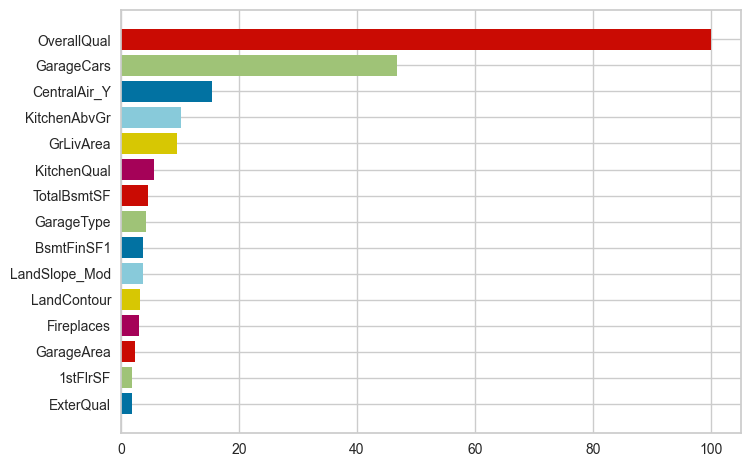

In [65]:
# Creating the FeatureImportances visualizer
viz = FeatureImportances(regressor, topn=15)
viz.fit(X_train, y_train)

In [66]:
# Creating a dictionary with features and their importances
d = {'features': viz.features_, 'importances': viz.feature_importances_}

# Creating a DataFrame from the dictionary
df = pd.DataFrame(d)

# Displaying the DataFrame
print(df)

         features  importances
0       ExterQual     1.904006
1        1stFlrSF     1.906161
2      GarageArea     2.389627
3      Fireplaces     3.064395
4     LandContour     3.279521
5   LandSlope_Mod     3.785165
6      BsmtFinSF1     3.829005
7      GarageType     4.278115
8     TotalBsmtSF     4.642340
9     KitchenQual     5.541571
10      GrLivArea     9.577664
11   KitchenAbvGr    10.191350
12   CentralAir_Y    15.498699
13     GarageCars    46.732025
14    OverallQual   100.000000


In [67]:
df = dataset[["OverallQual","GarageCars","CentralAir_Y","GrLivArea", "GarageType","TotalBsmtSF", "GarageQual", "KitchenQual","FireplaceQu","LandContour", "SalePrice"]]

df.head()

,OverallQual,GarageCars,CentralAir_Y,GrLivArea,GarageType,TotalBsmtSF,GarageQual,KitchenQual,FireplaceQu,LandContour,SalePrice
0,7,2,1,1710.0,1.0,856.0,5,2,3,3.0,208500.0
1,6,2,1,1262.0,1.0,1262.0,5,3,5,3.0,181500.0
2,7,2,1,1786.0,1.0,920.0,5,2,5,3.0,223500.0
3,7,3,1,1717.0,5.0,756.0,5,2,2,3.0,140000.0
4,8,3,1,2198.0,1.0,1145.0,5,2,5,3.0,250000.0


In [68]:
# Get the minimum and maximum values of the specified columns
min_max_values = df[['GrLivArea', "TotalBsmtSF"]].agg(['min', 'max'])
min_max_values

,GrLivArea,TotalBsmtSF
min,334.000,42.0
max,2747.625,2052.0


In [69]:
X = df.drop("SalePrice",axis=1)
y = df["SalePrice"]

In [70]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor()
xgb_model.fit(X,y)
xgb_model.score(X,y)

0.989999173130073

In [71]:
# Make predictions on the training data
y_pred = xgb_model.predict(X)

In [72]:
# Assign the predicted values to a new column in the DataFrame using .loc
df.loc[:, "y_pred"] = y_pred

C:\Users\DELL\AppData\Local\Temp\ipykernel_4632\674964882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, "y_pred"] = y_pred


In [73]:
from sklearn.metrics import r2_score, mean_absolute_error
"r2",r2_score(y,y_pred), "rmse", mean_absolute_error(y,y_pred)**.5

('r2', 0.989999173130073, 'rmse', 68.47728428599466)

In [74]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 5, max_samples=0.6, random_state = 0)
regressor.fit(X, y)
regressor.score(X,y)

0.9344433035861966

In [75]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X,y)
lr_model.score(X,y)

0.8388756414437002

In [76]:
list(df.drop(["SalePrice","y_pred"],axis=1).columns)

['OverallQual',
 'GarageCars',
 'CentralAir_Y',
 'GrLivArea',
 'GarageType',
 'TotalBsmtSF',
 'GarageQual',
 'KitchenQual',
 'FireplaceQu',
 'LandContour']

In [77]:
#inputs
model = xgb_model
selected_features = list(df.drop(["SalePrice","y_pred"],axis=1).columns)

import joblib

# save the model
joblib.dump(model,open("xgb_model.joblib","wb"))

# save column names (selected features)
joblib.dump(selected_features, open("features_list.joblib","wb"))

In [78]:
joblib.__version__

'1.2.0'

## Real-time Prediction

In [79]:
# Load the list of features
columns = joblib.load("features_list.joblib")
columns

['OverallQual',
 'GarageCars',
 'CentralAir_Y',
 'GrLivArea',
 'GarageType',
 'TotalBsmtSF',
 'GarageQual',
 'KitchenQual',
 'FireplaceQu',
 'LandContour']

### Input new data

In [80]:
# Sample user input
sample_one = pd.DataFrame({
    'OverallQual': 8,
    'GarageCars': 2,
    'CentralAir_Y': 1,
    'GrLivArea': 1250.0,
    'GarageType': 5.0,
    'TotalBsmtSF': 856.0,
    'GarageQual': 5,
    'KitchenQual': 4,
    'FireplaceQu': 4,
    'LandContour': 3.0
}, index=[0])  # Specify the index as [0])

In [81]:
df_s = pd.DataFrame(sample_one)
df_s

,OverallQual,GarageCars,CentralAir_Y,GrLivArea,GarageType,TotalBsmtSF,GarageQual,KitchenQual,FireplaceQu,LandContour
0,8,2,1,1250.0,5.0,856.0,5,4,4,3.0


### Load Model 

In [82]:
model = joblib.load(open("xgb_model.joblib","rb"))

### Predict

In [83]:
# Predict button
pred_price = round(model.predict(df_s)[0])
print(f"Your car's price: ${pred_price}")

Your car's price: $187817
